## 📚 Library Descriptions

- **pandas**, **numpy** – Used for data loading, cleaning, and performing numerical operations.
- **matplotlib**, **seaborn** – Essential for creating visualizations and exploring data patterns.
- **datetime** – Handles and manipulates date-related fields efficiently.
- **warnings** – Suppresses unnecessary warning messages for cleaner output.
- **StandardScaler** – Normalizes numerical features before applying clustering algorithms.
- **KMeans** – A clustering algorithm used to segment data into distinct groups.
- **silhouette_score** – Evaluates the quality and separation of clustering results.
- **plt.style.use**, **sns.set_palette** – Enhances the aesthetics and styling of plots.

In [1]:
# Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

from sklearn.preprocessing import StandardScaler # For data normalization
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


Loading the Dataset
This step reads the customer transaction data from the specified file path using pandas and displays the first few rows to verify that the dataset loaded correctly.


In [2]:
df = pd.read_csv("C:\\Users\\elsingy\\Documents\\AMDARI DS\\Internship\\BankTrust\\BankTrustDataset.csv")
df.head()

,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
947912,T8500375,C2369196,2022-06-23,63240,47.24,2000-05-25,M,South Carolinemouth,709.29
947913,T6489692,C2369196,2022-04-05,71535,34.10,2000-05-25,M,South Carolinemouth,675.19
947914,T1323454,C2369196,2022-03-14,73613,52.06,2000-05-25,M,South Carolinemouth,623.13
947915,T8162746,C2369196,2022-01-30,231644,55.67,2000-05-25,M,South Carolinemouth,678.80
947916,T6597562,C2369196,2022-07-21,101505,64.45,2000-05-25,M,South Carolinemouth,614.35


In [3]:
df.tail()

,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
947912,T8500375,C2369196,2022-06-23,63240,47.24,2000-05-25,M,South Carolinemouth,709.29
947913,T6489692,C2369196,2022-04-05,71535,34.10,2000-05-25,M,South Carolinemouth,675.19
947914,T1323454,C2369196,2022-03-14,73613,52.06,2000-05-25,M,South Carolinemouth,623.13
947915,T8162746,C2369196,2022-01-30,231644,55.67,2000-05-25,M,South Carolinemouth,678.80
947916,T6597562,C2369196,2022-07-21,101505,64.45,2000-05-25,M,South Carolinemouth,614.35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947917 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       947917 non-null  object 
 1   CustomerID          947917 non-null  object 
 2   TransactionDate     947917 non-null  object 
 3   TransactionTime     947917 non-null  int64  
 4   TransactionAmount   947917 non-null  float64
 5   CustomerDOB         947917 non-null  object 
 6   CustGender          947917 non-null  object 
 7   CustLocation        947917 non-null  object 
 8   CustAccountBalance  947917 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 65.1+ MB


In [5]:
df1 = df.copy()
# Loading and Copying DataFrames

## **Phase 1: Exploratory Data Analysis**

### **Basic Info**

This phase provides an initial understanding of the dataset by:

- Displaying the **shape** of the dataset to show how many rows and columns it contains.
- Identifying the **data types** of each column.
- Checking for **missing values** to highlight potential data quality issues

In [8]:
print("Dataset Shape:", df.shape)
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
print(df.describe())


Dataset Shape: (947917, 9)
Data Types:
TransactionID          object
CustomerID             object
TransactionDate        object
TransactionTime         int64
TransactionAmount     float64
CustomerDOB            object
CustGender             object
CustLocation           object
CustAccountBalance    float64
dtype: object

Missing Values:
TransactionID         0
CustomerID            0
TransactionDate       0
TransactionTime       0
TransactionAmount     0
CustomerDOB           0
CustGender            0
CustLocation          0
CustAccountBalance    0
dtype: int64

Basic Statistics:
       TransactionTime  TransactionAmount  CustAccountBalance
count    947917.000000      947917.000000       947917.000000
mean     117862.497794        1575.545842        25664.142689
std       69295.879093        2670.821963        36565.245859
min           0.000000           1.000000            0.000000
25%       55820.000000          44.830000         2760.070000
50%      115937.000000          66.36000

## **Checking for Duplicates**

This step ensures the dataset’s integrity and consistency by performing several checks:

- Identifying **duplicate records** across the entire dataset.
- Detecting duplicates within the **TransactionID** column to confirm that each transaction is unique.
- Counting the number of **unique customers** to understand customer volume.
- Examining the **distribution of customer gender** for demographic insights.
- Inspecting the **range of birth dates** to detect invalid or unrealistic values, helping validate data accuracy and reliability.

These checks help ensure the dataset is clean, trustworthy, and ready for deeper analysis.

In [10]:
# 1 Check for duplicates
print("Duplicate transactions:", df.duplicated().sum())
print("Duplicate TransactionIDs:", df["TransactionID"].duplicated().sum())
# Data Consistency
print("Unique Customers:", df['CustomerID'].nunique())
print("Gender Distribution:")
print(df['CustGender'].value_counts())

# Check for invalid dates
print("\nDate range:")
print("Earliest DOB:", df['CustomerDOB'].min())
print("Latest DOB:", df['CustomerDOB'].max())


Duplicate transactions: 0
Duplicate TransactionIDs: 48431
Unique Customers: 82000
Gender Distribution:
CustGender
M    474360
F    473557
Name: count, dtype: int64

Date range:
Earliest DOB: 1944-10-24
Latest DOB: 2007-10-22


In [11]:
# Dataset Overview & Duplicate Cleanup
df = df.drop_duplicates(subset=['TransactionID'])
print("Duplicate transactions: ", df.duplicated().sum())
print("Duplicate TransactionIDs: ", df['TransactionID'].duplicated().sum())


Duplicate transactions:  0
Duplicate TransactionIDs:  0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899486 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       899486 non-null  object 
 1   CustomerID          899486 non-null  object 
 2   TransactionDate     899486 non-null  object 
 3   TransactionTime     899486 non-null  int64  
 4   TransactionAmount   899486 non-null  float64
 5   CustomerDOB         899486 non-null  object 
 6   CustGender          899486 non-null  object 
 7   CustLocation        899486 non-null  object 
 8   CustAccountBalance  899486 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.6+ MB


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947917 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       947917 non-null  object 
 1   CustomerID          947917 non-null  object 
 2   TransactionDate     947917 non-null  object 
 3   TransactionTime     947917 non-null  int64  
 4   TransactionAmount   947917 non-null  float64
 5   CustomerDOB         947917 non-null  object 
 6   CustGender          947917 non-null  object 
 7   CustLocation        947917 non-null  object 
 8   CustAccountBalance  947917 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 65.1+ MB


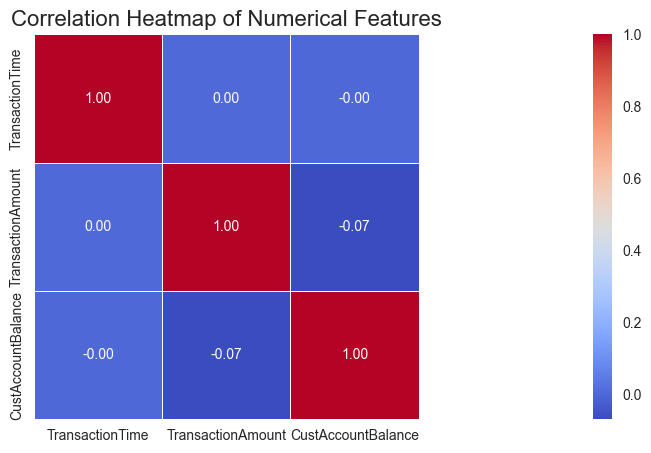

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set figure size
plt.figure(figsize=(45, 5))

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # format numbers
    cmap="coolwarm",     # color palette
    linewidths=0.5,      # lines between cells
    square=True
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

## **Dataset Overview**

This section provides a concise summary of the dataset by:

- Displaying the **shape** of the dataset (number of rows and columns).
- Calculating the **number of unique customers** to understand customer volume.
- Showing the **transaction date range** to identify the time span covered by the data.
- Computing the **total transaction value** to gauge overall sales volume.
- Calculating the **average customer account balance** to understand financial characteristics.

Together, these metrics offer a quick, high‑level understanding of the dataset’s scale, structure, and financial insights before deeper analysis.

In [14]:
# DATASET OVERVIEW
print("DATASET OVERVIEW")
print(f"Dataset shape: {df.shape}")
print(f"Number of unique customers: {df['CustomerID'].nunique()}")
print(f"Date range: {df['TransactionDate'].min()} to {df['TransactionDate'].max()}")
print(f"Total transaction value: {df['TransactionAmount'].sum():,.2f}")
print(f"Average account balance: {df['CustAccountBalance'].mean():,.2f}")


DATASET OVERVIEW
Dataset shape: (899486, 9)
Number of unique customers: 81541
Date range: 2020-01-01 to 2022-12-31
Total transaction value: 1,416,692,154.20
Average account balance: 25,653.16


In [17]:
# Basic dataset information
print("DATASET STRUCTURE")
print(df.info())
print("\nFirst 10 rows:")
display(df.head(10))

# Basic statistics
print("\nBASIC STATISTICS")
print(df[['TransactionAmount', 'CustAccountBalance']].describe())

# Missing values
print("\nMISSING VALUES")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


DATASET STRUCTURE
<class 'pandas.core.frame.DataFrame'>
Index: 899486 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       899486 non-null  object 
 1   CustomerID          899486 non-null  object 
 2   TransactionDate     899486 non-null  object 
 3   TransactionTime     899486 non-null  int64  
 4   TransactionAmount   899486 non-null  float64
 5   CustomerDOB         899486 non-null  object 
 6   CustGender          899486 non-null  object 
 7   CustLocation        899486 non-null  object 
 8   CustAccountBalance  899486 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.6+ MB
None

First 10 rows:


,TransactionID,CustomerID,TransactionDate,TransactionTime,TransactionAmount,CustomerDOB,CustGender,CustLocation,CustAccountBalance
0,T9105905,C1419610,2021-06-18,74921,177.72,1991-08-13,F,East Gordonside,29923.49
1,T3229540,C1419610,2021-07-16,145601,304.89,1991-08-13,F,East Gordonside,29618.60
2,T5116286,C1419610,2021-01-14,113217,79.68,1991-08-13,F,East Gordonside,29538.92
3,T4475301,C5614226,2020-04-03,72506,3685.28,1956-09-29,M,Donaldfort,62152.00
4,T2953823,C5614226,2020-12-15,143619,5452.50,1956-09-29,M,Donaldfort,56699.50
5,T8158456,C5614226,2020-01-10,114835,7106.78,1956-09-29,M,Donaldfort,49592.72
6,T5402092,C5614226,2022-10-11,74538,4890.07,1956-09-29,M,Donaldfort,54482.79
7,T6234368,C5614226,2020-06-29,112742,5280.39,1956-09-29,M,Donaldfort,49202.40
8,T6072805,C5614226,2021-06-26,85357,6975.66,1956-09-29,M,Donaldfort,42226.74
9,T7427427,C5614226,2021-07-02,53145,6789.87,1956-09-29,M,Donaldfort,35436.87



BASIC STATISTICS
       TransactionAmount  CustAccountBalance
count      899486.000000       899486.000000
mean         1575.001895        25653.156604
std          2670.259484        36549.245326
min             1.000000            0.000000
25%            44.810000         2762.537500
50%            66.320000        11662.610000
75%          3237.147500        33533.147500
max         22032.730000       456249.980000

MISSING VALUES
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


## **In-depth Transaction Analysis**

This section provides a comprehensive examination of transaction behavior within the dataset.

It begins by summarizing key transaction metrics, including:

- The **total number of transactions**
- The **average transaction amount**
- The **largest and smallest recorded transactions**

These metrics offer a clear overview of overall spending activity and help identify unusual or extreme values.

Next, transactions are grouped into defined monetary segments using the following bins:

- **Micro:** 0–100  
- **Small:** 100–500  
- **Medium:** 500–1k  
- **Large:** 1k–5k  
- **Very Large:** 5k+

This segmentation provides deeper insight into customer spending patterns and highlights which transaction ranges are most common. It supports more advanced behavioral and financial segmentation analyses by revealing how customers distribute their spending across different value categories.

In [21]:
# Transaction Analysis and Segmentation
print("\n=== TRANSACTION ANALYSIS")

# Transaction amount analysis
print(f"Total Transactions: {len(df) :,}")
print(f"The Average Transaction Amount: {df['TransactionAmount'].mean():.2f}")
print(f"The Largest Transaction: {df['TransactionAmount'].max():.2f}")
print(f"The Smallest Transaction: {df['TransactionAmount'].min():.2f}")

# TRANSACTION AMOUNT SEGMENTS

amount_bins = [0, 100, 500, 1000, 5000, float('inf')]
amount_labels = ['Micro (0-100)', 'Small (100-500)', 'Medium (500-1k)', 'Large (1k-5k)', 'Very Large (5k+)']
df['Amount_Segment'] = pd.cut(df['TransactionAmount'], bins=amount_bins, labels=amount_labels)

print("\nTransaction Amount Segments:")
print(df['Amount_Segment'].value_counts().sort_index())



=== TRANSACTION ANALYSIS
Total Transactions: 899,486
The Average Transaction Amount: 1575.00
The Largest Transaction: 22032.73
The Smallest Transaction: 1.00

Transaction Amount Segments:
Amount_Segment
Micro (0-100)       566961
Small (100-500)      79936
Medium (500-1k)        591
Large (1k-5k)       115840
Very Large (5k+)    136158
Name: count, dtype: int64


## **Top 10 Customers by Transaction Amount**

This section identifies and analyzes the **top 10 customers** based on their total transaction amounts, offering valuable insights into high‑value clients who contribute the most to overall revenue.

The analysis begins by aggregating key metrics at the customer level, including:

- **Total amount spent**
- **Number of transactions**
- **Average transaction value**
- **Most recent account balance**
- **Gender**
- **Location**

These aggregated statistics provide a detailed financial and demographic profile for each customer.

After aggregation, the data is sorted to highlight the **top 10 highest spenders**, enabling a focused view of customer contribution to overall business performance.

To support visual interpretation, two side‑by‑side bar charts are generated:

- **Chart 1:** Top 10 customers by total transaction amount (spending concentration)  
- **Chart 2:** Top 10 customers by transaction count (engagement frequency)

Together, these visuals enhance customer segmentation and strategic decision‑making by identifying both **high‑spending** and **high‑engagement** customers. This insight can guide loyalty programs, targeted marketing initiatives, and premium service offerings.

In [28]:
df.head().T

,0,1,2,3,4
TransactionID,T9105905,T3229540,T5116286,T4475301,T2953823
CustomerID,C1419610,C1419610,C1419610,C5614226,C5614226
TransactionDate,2021-06-18,2021-07-16,2021-01-14,2020-04-03,2020-12-15
TransactionTime,74921,145601,113217,72506,143619
TransactionAmount,177.72,304.89,79.68,3685.28,5452.5
CustomerDOB,1991-08-13,1991-08-13,1991-08-13,1956-09-29,1956-09-29
CustGender,F,F,F,M,M
CustLocation,East Gordonside,East Gordonside,East Gordonside,Donaldfort,Donaldfort
CustAccountBalance,29923.49,29618.6,29538.92,62152.0,56699.5
Amount_Segment,Small (100-500),Small (100-500),Micro (0-100),Large (1k-5k),Very Large (5k+)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899486 entries, 0 to 947916
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   TransactionID       899486 non-null  object  
 1   CustomerID          899486 non-null  object  
 2   TransactionDate     899486 non-null  object  
 3   TransactionTime     899486 non-null  int64   
 4   TransactionAmount   899486 non-null  float64 
 5   CustomerDOB         899486 non-null  object  
 6   CustGender          899486 non-null  object  
 7   CustLocation        899486 non-null  object  
 8   CustAccountBalance  899486 non-null  float64 
 9   Amount_Segment      899486 non-null  category
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 69.5+ MB



 TOP 10 CUSTOMERS BY TOTAL TRANSACTION AMOUNT 
Top 10 Customers:


,Total_Amount,Transaction_Count,Avg_Amount,Last_Balance,CustGender,Location
CustomerID,,,,,,
C4616926,230287.98,44,5233.82,0.00,F,Lake Williamside
C4510031,202168.38,38,5320.22,0.00,M,East Kevin
C2162054,202143.59,35,5775.53,0.00,M,Port Terryville
C4986191,191194.21,42,4552.24,0.00,F,Bretthaven
C4626616,175436.51,34,5159.90,10675.14,F,Lisaburgh
C1906432,172851.89,36,4801.44,0.00,M,Rosstown
C6585409,160858.58,33,4874.50,18547.11,F,West Jayne
C2409527,148383.80,29,5116.68,0.00,M,Mauriceside
C5779944,146148.29,31,4714.46,7481.76,F,Port Jasonhaven


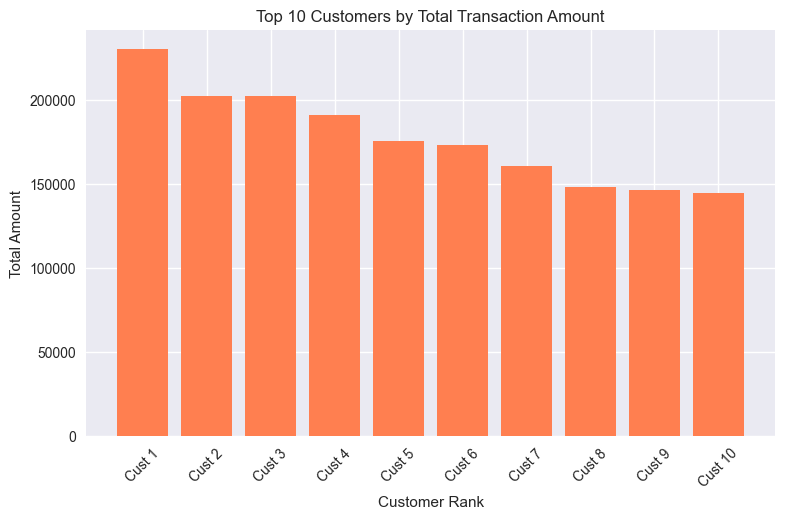

In [37]:
# Top 10 Customers by Total Transaction Amount
print("\n TOP 10 CUSTOMERS BY TOTAL TRANSACTION AMOUNT ")
top_customers = df.groupby('CustomerID').agg({
    'TransactionAmount': ['sum', 'count', 'mean'],
    'CustAccountBalance': 'last',
    'CustGender': 'first',
    'CustLocation': 'first'
}).round(2)

top_customers.columns = ['Total_Amount', 'Transaction_Count', 'Avg_Amount', 'Last_Balance', 'CustGender', 'Location']
top_customers = top_customers.sort_values('Total_Amount', ascending=False)

print("Top 10 Customers:")
display(top_customers.head(10))

# Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1) #to create more plots within main plots use subplot
top_10_amount = top_customers.head(10)
plt.bar(range(10), top_10_amount['Total_Amount'], color='coral')
plt.title("Top 10 Customers by Total Transaction Amount")
plt.xlabel("Customer Rank")
plt.ylabel("Total Amount")
plt.xticks(range(10), [f'Cust {i+1}' for i in range(10)])

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## **Gender Distribution Analysis**

This section performs a Gender Distribution Analysis to understand how customer gender influences financial behavior and transaction patterns within the dataset.

The summary table provides aggregated metrics for each gender, including:

- **Number of unique customers**
- **Total transaction amount**
- **Transaction count**
- **Average account balance**

These metrics offer a quantitative overview of gender‑based spending and engagement tendencies.

The visualizations complement the statistical summary by presenting three key perspectives:

- **Pie Chart:** Shows the proportion of male and female customers, giving a quick view of demographic distribution.
- **Bar Chart 1:** Displays the total transaction amount by gender, highlighting which gender contributes more to overall revenue.
- **Bar Chart 2:** Compares average account balances by gender, revealing differences in financial standing or saving behavior.

Together, these analyses provide actionable insights for gender‑based customer segmentation. They support targeted marketing, personalized financial product offerings, and improved customer engagement strategies based on demographic dynamics.


== GENDER DISTRIBUTION ANALYSIS ==
            Unique_Customers  Total_Amount  Avg_Amount  Transaction_Count  \
CustGender                                                                  
F                      40735  7.010943e+08     1560.61             449245   
M                      40973  7.155979e+08     1589.37             450241   

            Avg_Balance  
CustGender               
F              25792.69  
M              25513.93  


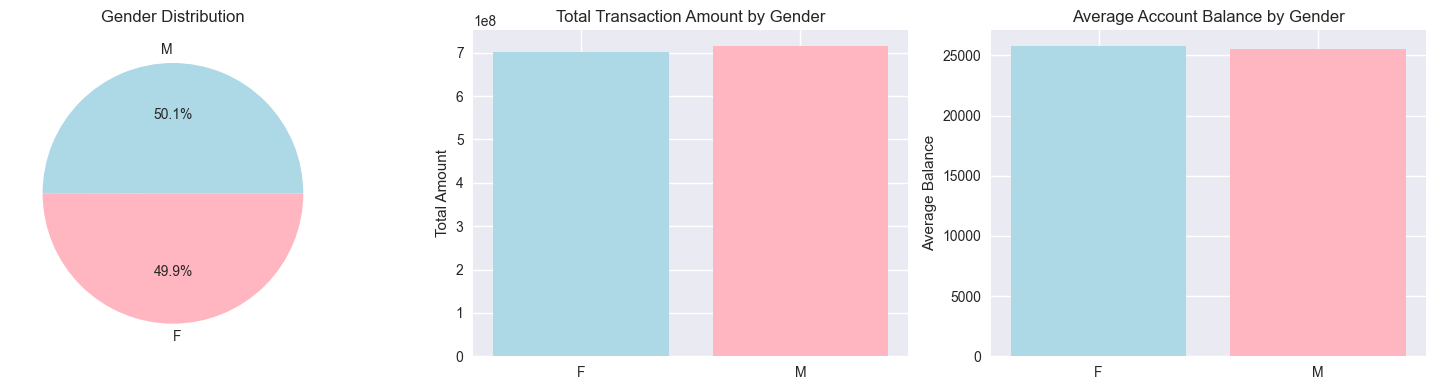

In [39]:
# Gender Distribution Analysis

# 1. Gender Distribution Analysis
print("\n== GENDER DISTRIBUTION ANALYSIS ==")
gender_stats = df.groupby('CustGender').agg({
    'CustomerID': 'nunique',                      # Count of unique customers
    'TransactionAmount': ['sum', 'mean', 'count'], # Total, average, and count of transactions
    'CustAccountBalance': 'mean'                  # Average account balance
}).round(2)

# Renaming columns for clarity
gender_stats.columns = [
    'Unique_Customers',
    'Total_Amount',
    'Avg_Amount',
    'Transaction_Count',
    'Avg_Balance'
]
print (gender_stats) 	# Displaying the summary table

# Visualization Setup
plt.figure(figsize=(15, 4)) # Pie chart: Gender distribution

plt.subplot(1, 3, 1)
gender_counts = df['CustGender'].value_counts()
plt.pie(
    gender_counts.values,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['lightblue', 'lightpink']
)
plt.title('Gender Distribution')

plt.subplot(1, 3, 2) # Placeholder for second subplot (e.g., bar chart)
gender_amount = df.groupby('CustGender')['TransactionAmount'].sum()
plt.bar(
    gender_amount.index,
    gender_amount.values,
    color=['lightblue', 'lightpink']
)
plt.title('Total Transaction Amount by Gender')
plt.ylabel('Total Amount')

# Bar Chart: Average Account Balance by Gender
plt.subplot(1, 3, 3)
gender_avg_balance = df.groupby('CustGender')['CustAccountBalance'].mean()
plt.bar(
    gender_avg_balance.index,
    gender_avg_balance.values,
    color=['lightblue', 'lightpink']
)
plt.title('Average Account Balance by Gender')
plt.ylabel('Average Balance')

plt.tight_layout()
plt.show()


## **Location Analysis**

This section performs a comprehensive Location Analysis to uncover geographic patterns in customer behavior, financial activity, and spending capacity.

The analytical summary aggregates data by **CustomerLocation**, capturing:

- **Number of unique customers**
- **Total transaction amount**
- **Average transaction amount**
- **Average account balance**

Sorting by customer count provides a clear view of where the organization’s customer base is most concentrated.

The visualizations offer a multi‑dimensional understanding of geographic trends:

- **Chart 1:** Top 10 locations by customer count, showing where the majority of clients reside.
- **Chart 2:** Locations with the highest total transaction volumes, highlighting financially active regions.
- **Chart 3:** Average account balances by location, revealing relative wealth or liquidity across regions.
- **Chart 4:** Locations ranked by average transaction amount, helping to gauge typical purchase size.

Together, these insights support a data‑driven understanding of regional performance. They help guide resource allocation, marketing focus, and expansion strategies based on economic activity and customer engagement at the location level.


 === CUSTOMER LOCATION ANALYSIS ===
Top 10 Locations by Customer Count:


,Unique_Customers,Total_Amount,Avg_Amount,Transaction_Count,Avg_Balance
CustLocation,,,,,
Smithmouth,701,597855.97,852.86,701,25962.40
Jonesmouth,671,590182.34,879.56,671,26721.03
Smithfort,534,498191.97,932.94,534,22978.75
Smithview,532,632685.51,1189.26,532,32495.64
Smithshire,520,1182398.76,2273.84,520,22592.17
Smithburgh,493,723601.38,1467.75,493,32262.18
Smithside,446,418122.88,937.50,446,24235.58
Smithfurt,403,474992.87,1178.64,403,26640.62
Smithbury,365,523803.88,1435.08,365,28051.76


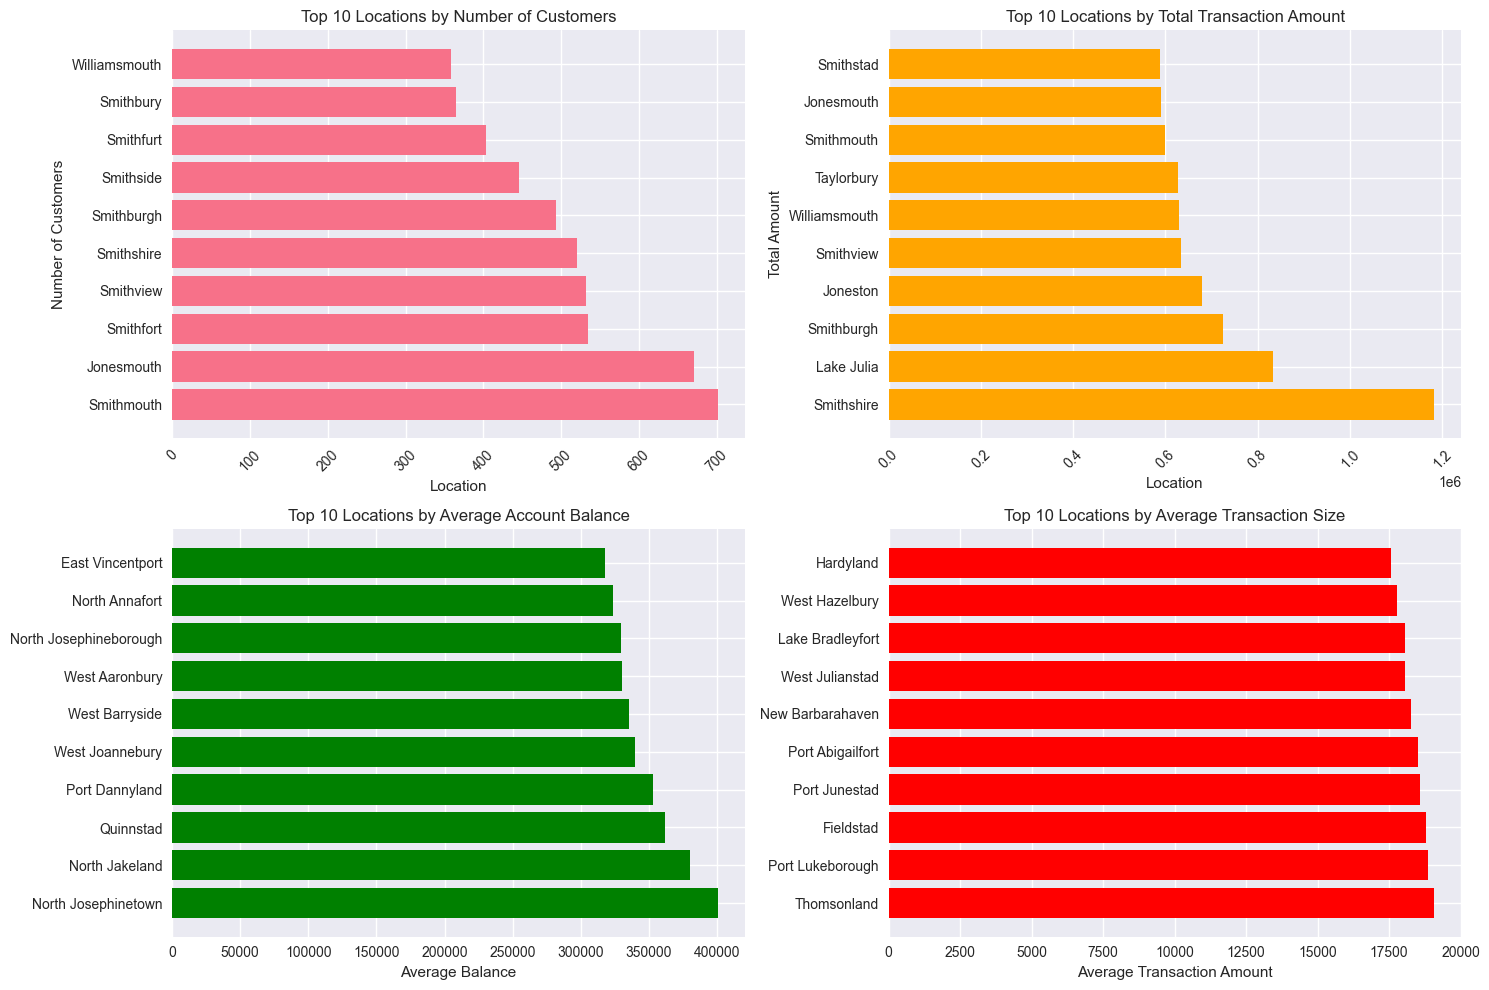

In [40]:
# Location-Based Customer Analysis with Visualizations

# 1. Location Analysis Summary
print("\n === CUSTOMER LOCATION ANALYSIS ===")

location_stats = df.groupby('CustLocation').agg({
    'CustomerID': 'count',
    'TransactionAmount': ['sum', 'mean', 'count'],
    'CustAccountBalance': 'mean'
}).round(2)

# Rename columns for clarity
location_stats.columns = [
    'Unique_Customers',
    'Total_Amount',
    'Avg_Amount',
    'Transaction_Count',
    'Avg_Balance'
]

# Sort by customer count
location_stats = location_stats.sort_values('Unique_Customers', ascending=False)

# Display top 10 locations
print("Top 10 Locations by Customer Count:")
top_locations = location_stats.head(10)
display(top_locations)

# 2. Visualization
plt.figure(figsize=(15, 10))

# Bar Chart: Top 10 Locations by Customer Count
plt.subplot(2, 2, 1)
top_locations_customers = location_stats.head(10)['Unique_Customers']
plt.barh(range(10), top_locations_customers.values)
plt.yticks(range(10), top_locations_customers.index)
# top_locations['Unique_Customers'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Number of Customers")
plt.xlabel("Location")
plt.ylabel("Number of Customers")

# Bar Chart: Total Transaction Amount by Location
plt.subplot(2, 2, 2)
top_locations_amount = location_stats.sort_values('Total_Amount', ascending=False).head(10)['Total_Amount']
plt.barh(range(10), top_locations_amount.values, color='orange')
plt.yticks(range(10), top_locations_amount.index)
# top_transaction_locations['Total_Amount'], color='lightgreen')
plt.xticks(rotation=45)
plt.title("Top 10 Locations by Total Transaction Amount")
plt.xlabel("Location")
plt.ylabel("Total Amount")

plt.subplot(2, 2, 3)
top_locations_balance = location_stats.sort_values('Avg_Balance', ascending=False).head(10)['Avg_Balance']
plt.barh(range(10), top_locations_balance.values, color='green')
plt.yticks(range(10), top_locations_balance.index)
plt.title('Top 10 Locations by Average Account Balance')
plt.xlabel('Average Balance')

# Top 10 Locations by Average Transaction Size
plt.subplot(2, 2, 4)
location_transaction_size = location_stats.sort_values("Avg_Amount", ascending=False).head(10)["Avg_Amount"]
plt.barh(range(10), location_transaction_size.values, color='red')
plt.yticks(range(10), location_transaction_size.index)
plt.title("Top 10 Locations by Average Transaction Size")
plt.xlabel("Average Transaction Amount")

# Final layout adjustments
plt.tight_layout()
plt.show()


## **Temporal Analysis**

This analysis explores customer transaction patterns across different time periods—monthly, weekly, and hourly—by transforming date and time fields into meaningful components such as **TransactionMonth**, **TransactionDay**, and **TransactionHour**.

---

### **Monthly Summary Table**

The data is aggregated by month to show:

- **Transaction Count:** Total number of transactions per month  
- **Total Transaction Amount:** Sum of all transaction values per month  
- **Unique Customers:** Number of distinct customers transacting each month  

This provides a macro‑level view of business activity trends over time.

---

### **Visualizations**

1. **Monthly Transaction Count Trend**  
   A line plot showing fluctuations in transaction volume across months.

2. **Monthly Total Transaction Amount**  
   A line chart highlighting seasonal or cyclical financial surges.

3. **Day‑of‑Week Transaction Distribution**  
   Reveals behavioral patterns across weekdays and weekends.

4. **Hourly Transaction Frequency**  
   Maps peak transactional periods within each day.

---

### **Strategic Applications**

These insights support:

- **Demand Forecasting**  
- **Service Availability Optimization**  
- **Timing of Promotions and Operations**

All based on observed customer behavior patterns over time.


=== TEMPORAL ANALYSIS === 
Monthly_Trends


,Transaction_Count,Total_Amount,Unique_Customers
TransactionMonth,,,
2020-01,25380,40159980.12,20371
2020-02,23990,37657697.26,19415
2020-03,25840,41473881.78,20668
2020-04,24625,38763119.56,19990
2020-05,25721,40244569.96,20589
2020-06,24658,38301846.62,19841
2020-07,25389,39790048.28,20386
2020-08,25515,40287170.97,20419
2020-09,24464,38479159.55,19802


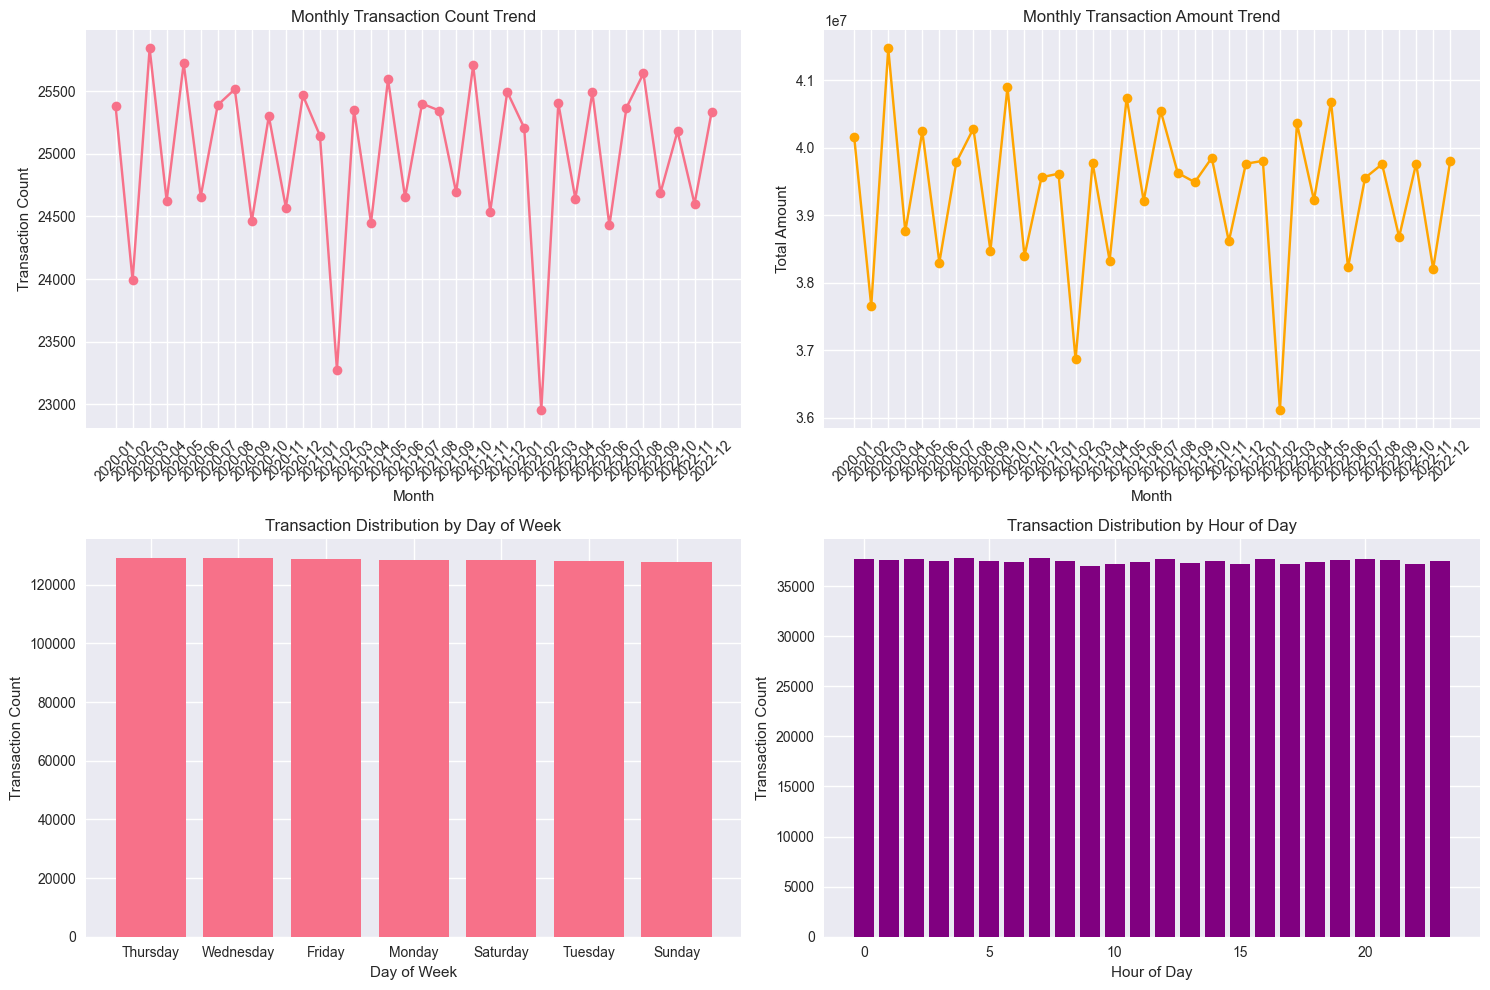

In [42]:
# Temporal Analysis
print("\n=== TEMPORAL ANALYSIS === ")
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('M')
df['TransactionDay'] = df['TransactionDate'].dt.day_name()
df['TransactionHour'] = df['TransactionTime'] // 10000  # Extract hour

# Monthly trends
monthly_trends = df.groupby('TransactionMonth').agg({
    'TransactionID': 'count',
    'TransactionAmount': 'sum',
    'CustomerID': 'nunique'
}).round(2)

monthly_trends.columns = ['Transaction_Count', 'Total_Amount', 'Unique_Customers']
print("Monthly_Trends")
display(monthly_trends)

# Visualization
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(monthly_trends.index.astype(str), monthly_trends['Transaction_Count'], marker='o')
plt.title('Monthly Transaction Count Trend')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.plot(monthly_trends.index.astype(str), monthly_trends['Total_Amount'], marker='o', color='orange')
plt.title('Monthly Transaction Amount Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
day_distribution = df['TransactionDay'].value_counts()
plt.bar(day_distribution.index, day_distribution.values)
plt.title('Transaction Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Transaction Count')

plt.subplot(2, 2, 4)
hour_distribution = df['TransactionHour'].value_counts().sort_index()
plt.bar(hour_distribution.index, hour_distribution.values, color='purple')
plt.title('Transaction Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Transaction Count')

plt.tight_layout()
plt.show()


## **Customer Behavior Analysis**

This section applies customer behavior analysis to understand transaction activity patterns, spending capacity, and overall customer distribution across accounts. It emphasizes the importance of examining both **transaction frequency** and **account balance characteristics** to uncover meaningful customer profiles.

### **Statistical Overview**

The analysis focuses on transaction activity per customer, reporting key indicators such as:

- **Average number of transactions**
- **Median number of transactions**

Customers are then grouped into activity-based segments:

- **One-Time**
- **Occasional**
- **Regular**
- **Frequent**

These segments help identify varying levels of customer engagement.

Additionally, customers are categorized into financial tiers:

- **Very Low**
- **Low**
- **Medium**
- **High**
- **Very High**

This segmentation provides insights into income and wealth distribution across the customer base.

---

### **Visualizations**

1. **Activity Segment Distribution**  
   A bar chart showing how customers are distributed across activity segments, highlighting differences in transaction frequency.

2. **Account Balance Tier Distribution**  
   A bar chart illustrating the distribution of customers across financial tiers, revealing levels of financial stratification.

3. **Correlation Heatmap**  
   A heatmap visualizing relationships among key numerical features such as transaction amount, account balance, and transaction time. This helps uncover behavioral interdependencies.

---

### **Strategic Value**

Together, these analyses create a comprehensive behavioral profile of the customer base, enabling:

- **Data-driven segmentation**
- **Targeted retention strategies**
- **Personalized financial product development**

This structured approach to analyzing customer behavior is essential for financial institutions and businesses aiming to tailor services and marketing strategies to customer needs.

== CUSTOMER BEHAVIOR ANALYSIS ==
Average transactions per customer: 11.031088654787162
Median transactions per customer: 11.0
Most active customer: C9060593 transactions: 52
Least active customer: C1000107 transactions: 1

== CUSTOMER ACTIVITY SEGMENTS ==
One-time       9416
Occasional    23800
Regular       19909
Frequent      28413
VIP               3
Name: count, dtype: int64

Account Balance Segments:
Balance_Segment
Very Low      63013
Low          152714
Medium       262328
High         191541
Very High    145535
Name: count, dtype: int64


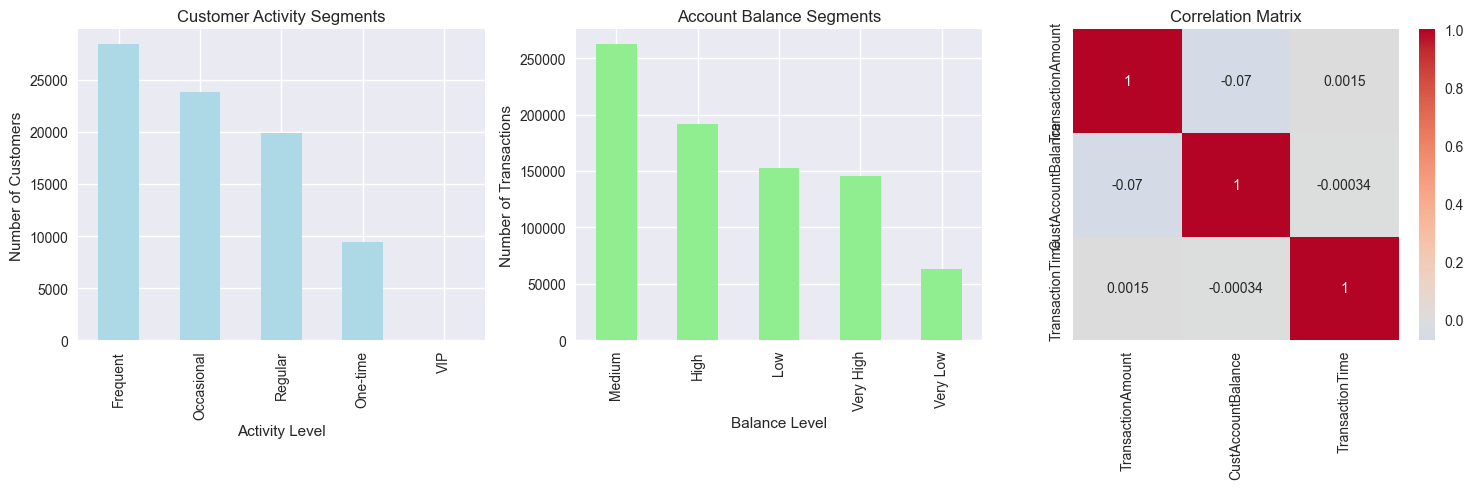

In [45]:
# Customer Behavior Analysis
print("== CUSTOMER BEHAVIOR ANALYSIS ==")

# Transactions per customer
transactions_per_customer = df.groupby('CustomerID').size()
print(f"Average transactions per customer: {transactions_per_customer.mean()}")
print(f"Median transactions per customer: {transactions_per_customer.median()}")
print(f"Most active customer: {transactions_per_customer.idxmax()} transactions: {transactions_per_customer.max()}")
print(f"Least active customer: {transactions_per_customer.idxmin()} transactions: {transactions_per_customer.min()}")

# Customer segmentation by activity
activity_segments = pd.cut(transactions_per_customer,
                           bins=[0, 1, 5, 15, 50, float('inf')],
                           labels=['One-time', 'Occasional', 'Regular', 'Frequent', 'VIP'])
print("\n== CUSTOMER ACTIVITY SEGMENTS ==")
print(activity_segments.value_counts().sort_index())

# Balance segments
balance_segments = pd.cut(df['CustAccountBalance'],
                          bins=[0, 1000, 5000, 20000, 50000, float('inf')],
                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df['Balance_Segment'] = balance_segments

print("\nAccount Balance Segments:")
print(df['Balance_Segment'].value_counts().sort_index())

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
activity_segments.value_counts().plot(kind='bar', color='lightblue')
plt.title("Customer Activity Segments")
plt.xlabel("Activity Level")
plt.ylabel('Number of Customers')

plt.subplot(1, 3, 2)
df['Balance_Segment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Account Balance Segments')
plt.xlabel('Balance Level')
plt.ylabel('Number of Transactions')

plt.subplot(1, 3, 3)
# Correlation heatmap for numerical variables
corr_matrix = df[['TransactionAmount', 'CustAccountBalance', 'TransactionTime']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947917 entries, 0 to 947916
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   TransactionID       947917 non-null  object 
 1   CustomerID          947917 non-null  object 
 2   TransactionDate     947917 non-null  object 
 3   TransactionTime     947917 non-null  int64  
 4   TransactionAmount   947917 non-null  float64
 5   CustomerDOB         947917 non-null  object 
 6   CustGender          947917 non-null  object 
 7   CustLocation        947917 non-null  object 
 8   CustAccountBalance  947917 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 65.1+ MB


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899486 entries, 0 to 947916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   TransactionID       899486 non-null  object        
 1   CustomerID          899486 non-null  object        
 2   TransactionDate     899486 non-null  datetime64[ns]
 3   TransactionTime     899486 non-null  int64         
 4   TransactionAmount   899486 non-null  float64       
 5   CustomerDOB         899486 non-null  object        
 6   CustGender          899486 non-null  object        
 7   CustLocation        899486 non-null  object        
 8   CustAccountBalance  899486 non-null  float64       
 9   Amount_Segment      899486 non-null  category      
 10  TransactionMonth    899486 non-null  period[M]     
 11  TransactionDay      899486 non-null  object        
 12  TransactionHour     899486 non-null  int64         
 13  Balance_Segment     815131 non-nul

In [47]:
df.head().T

,0,1,2,3,4
TransactionID,T9105905,T3229540,T5116286,T4475301,T2953823
CustomerID,C1419610,C1419610,C1419610,C5614226,C5614226
TransactionDate,2021-06-18 00:00:00,2021-07-16 00:00:00,2021-01-14 00:00:00,2020-04-03 00:00:00,2020-12-15 00:00:00
TransactionTime,74921,145601,113217,72506,143619
TransactionAmount,177.72,304.89,79.68,3685.28,5452.5
CustomerDOB,1991-08-13,1991-08-13,1991-08-13,1956-09-29,1956-09-29
CustGender,F,F,F,M,M
CustLocation,East Gordonside,East Gordonside,East Gordonside,Donaldfort,Donaldfort
CustAccountBalance,29923.49,29618.6,29538.92,62152.0,56699.5
Amount_Segment,Small (100-500),Small (100-500),Micro (0-100),Large (1k-5k),Very Large (5k+)


## **Phase 2: Data Preprocessing**

This phase focuses on cleaning and preparing the dataset for analysis or model training. It ensures that all entries are valid, consistent, and ready for further processing.

---

### **Step-by-Step Explanation**

#### **1. Checking for Missing Values**
The script examines the dataset for any missing values and prints the total count before cleaning begins.

#### **2. Removing Missing Entries**
Rows containing missing data are removed to maintain data integrity. The number of removed rows is displayed to track the impact of cleaning.

#### **3. Removing Duplicate Transactions**
Duplicate records are identified using the **TransactionID** column and removed. This ensures that each transaction appears only once in the dataset.

#### **4. Converting Transaction Dates**
The **TransactionDate** column is converted into a proper datetime format using `pandas.to_datetime()`, enabling accurate time-based operations such as monthly or hourly analysis.

#### **5. Final Dataset Summary**
The final dataset shape (rows and columns) is displayed, along with the number of unique customers (`CustomerID`). This confirms the dataset’s readiness for further analysis.

---

### **Outcome**

After preprocessing:

- The dataset is free from missing values  
- Duplicate transactions have been removed  
- Transaction dates are correctly formatted  
- The dataset is clean, consistent, and ready for the next steps of analysis or modeling  

This ensures a solid foundation for reliable insights and accurate model performance.

In [58]:
print("*" * 30)
print("PHASE 2: DATA PREPROCESSING")
print("*" * 30)

# Handle missing values if any
print("Checking for missing values...")
print("Missing values before cleaning: {df.isnull().sum()}")

# Remove any remaining missing values
initial_count = len(data_frame)
data_frame = data_frame.dropna()
print(f"Removed {initial_count - len(data_frame)} rows with missing values")

# Remove duplicate transactions
initial_count = len(data_frame)
data_frame = data_frame.drop_duplicates(subset=['TransactionID'])
print(f"Removed {initial_count - len(data_frame)} duplicate transactions")
# Ensure proper datetime format
data_frame['TransactionDate'] = pd.to_datetime(data_frame['TransactionDate'])
# Final dataset summary
print(f"Final Dataset shape: {data_frame.shape}")
print(f"Unique customers: {data_frame['CustomerID'].nunique()}")


******************************
PHASE 2: DATA PREPROCESSING
******************************
Checking for missing values...
Missing values before cleaning: {df.isnull().sum()}
Removed 0 rows with missing values
Removed 0 duplicate transactions
Final Dataset shape: (815131, 14)
Unique customers: 78517


## **Phase 3: Feature Engineering (RFM Metrics)**

This phase transforms cleaned transactional data into meaningful features that help assess customer behavior and value. The **RFM (Recency, Frequency, Monetary)** model is used to segment customers based on their purchase patterns.

---

### **Step-by-Step Explanation**

#### **1. Setting the Reference Date**
A reference date is defined as **one day after the most recent transaction**.  
This ensures accurate calculation of how recently each customer made a purchase.

---

#### **2. Computing RFM Metrics**
The dataset is aggregated by **CustomerID** to compute three key metrics:

- **Recency:** Number of days since the customer's last purchase  
  *(reference_date − last_transaction_date)*  
- **Frequency:** Total number of transactions made by the customer  
- **Monetary:** Total amount spent by the customer  

The resulting DataFrame, **`rfm_df`**, summarizes these metrics for each unique customer.

---

#### **3. Adding Customer Demographics**
Customer demographic attributes—such as **date of birth**, **gender**, and **location**—are merged into the RFM dataset.  
This enhances customer profiling and supports deeper segmentation and behavioral analysis.

---

#### **4. RFM Summary Statistics**
Summary statistics are generated for the Recency, Frequency, and Monetary columns, including:

- **Mean**
- **Minimum and maximum values**
- **Quantiles** (25th, 50th, 75th percentiles)

These statistics provide a high-level overview of customer distribution and spending behavior.

---

#### **5. Displaying Sample Data**
The first 10 rows of the final **`rfm_df`** DataFrame are displayed to verify structure and inspect sample customer profiles.

---

This phase produces a structured, enriched dataset that forms the foundation for customer segmentation, predictive modeling, and strategic marketing analysis.

In [67]:
print("\n" + "+" * 50)
print("PHASE 3: FEATURE ENGINEERING (RFM METRICS)")
print("+" * 50)

# Set reference date for Recency calculation
reference_date = df['TransactionDate'].max() + pd.Timedelta(days=1)
print(f"Reference date for Recency calculation:", {reference_date.date()})

# Calculate RFM metrics
rfm_df = df.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,   # Recency
    'TransactionID': 'count',                                       # Frequency
    'TransactionAmount': 'sum'                                      # Monetary
}).reset_index()

rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(f"RFM dataframe shape: {rfm_df.shape}")
print("=== First 10 rows of RFM data: ===")
display(rfm_df.head(10))


# Add Customer Demographics to RFM Data
customer_demographics = df.groupby('CustomerID').agg({
    'CustomerDOB': 'first',
    'CustGender': 'first',
    'CustLocation': 'first',
    'CustAccountBalance': 'last'
}).reset_index()

print("Customer Demographics Sample:")
display(customer_demographics.head(10).T)

# Merge RFM metrics with customer demographics
rfm_df = rfm_df.merge(customer_demographics, on='CustomerID', how='left')

# Print summary statistics for RFM metrics
print("\nRFM Metrics Summary:")
print(rfm_df[['Recency', 'Frequency', 'Monetary']].describe().T)

# Display first few rows of RFM data
print("\nFirst 10 rows of RFM data:")
display(rfm_df.head(10).T)



++++++++++++++++++++++++++++++++++++++++++++++++++
PHASE 3: FEATURE ENGINEERING (RFM METRICS)
++++++++++++++++++++++++++++++++++++++++++++++++++
Reference date for Recency calculation: {datetime.date(2023, 1, 1)}
RFM dataframe shape: (81541, 4)
=== First 10 rows of RFM data: ===


,CustomerID,Recency,Frequency,Monetary
0,C1000107,1040,1,96.41
1,C1000111,8,16,819.81
2,C1000159,106,15,695.53
3,C1000852,178,24,1355.99
4,C1000896,56,14,65914.10
5,C1000976,72,19,1064.70
6,C1001005,246,13,670.30
7,C1001021,458,1,4080.97
8,C1001094,88,19,96064.36
9,C1001172,642,1,7376.57


Customer Demographics Sample:


,0,1,2,3,4,5,6,7,8,9
CustomerID,C1000107,C1000111,C1000159,C1000852,C1000896,C1000976,C1001005,C1001021,C1001094,C1001172
CustomerDOB,2001-06-27,1952-11-18,1988-07-23,1985-10-06,1945-04-10,2003-06-24,1960-10-12,1987-06-26,1999-12-16,2002-05-29
CustGender,F,M,M,M,M,F,F,M,F,F
CustLocation,South Josh,New Peter,Lake Duncanburgh,Thomasborough,East Kim,New Nigelville,New Frances,Roseland,West Reeceborough,Brownchester
CustAccountBalance,1150.66,52895.11,3006.98,11922.49,43815.21,1660.27,51131.84,512.7,0.0,5539.94



RFM Metrics Summary:
             count          mean           std  min     25%      50%  \
Recency    81541.0    187.824677    237.063205  1.0   31.00    86.00   
Frequency  81541.0     11.031089      8.324877  1.0    3.00    11.00   
Monetary   81541.0  17373.985531  30557.214473  1.3  725.31  1090.81   

                75%        max  
Recency      243.00    1096.00  
Frequency     18.00      52.00  
Monetary   18205.76  230287.98  

First 10 rows of RFM data:


,0,1,2,3,4,5,6,7,8,9
CustomerID,C1000107,C1000111,C1000159,C1000852,C1000896,C1000976,C1001005,C1001021,C1001094,C1001172
Recency,1040,8,106,178,56,72,246,458,88,642
Frequency,1,16,15,24,14,19,13,1,19,1
Monetary,96.41,819.81,695.53,1355.99,65914.1,1064.7,670.3,4080.97,96064.36,7376.57
CustomerDOB,2001-06-27,1952-11-18,1988-07-23,1985-10-06,1945-04-10,2003-06-24,1960-10-12,1987-06-26,1999-12-16,2002-05-29
CustGender,F,M,M,M,M,F,F,M,F,F
CustLocation,South Josh,New Peter,Lake Duncanburgh,Thomasborough,East Kim,New Nigelville,New Frances,Roseland,West Reeceborough,Brownchester
CustAccountBalance,1150.66,52895.11,3006.98,11922.49,43815.21,1660.27,51131.84,512.7,0.0,5539.94


In [121]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81541 entries, 0 to 81540
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          81541 non-null  object 
 1   Recency             81541 non-null  int64  
 2   Frequency           81541 non-null  int64  
 3   Monetary            81541 non-null  float64
 4   CustomerDOB         81541 non-null  object 
 5   CustGender          81541 non-null  object 
 6   CustLocation        81541 non-null  object 
 7   CustAccountBalance  81541 non-null  float64
 8   R_Score             81541 non-null  int64  
 9   F_Score             81541 non-null  int64  
 10  M_Score             81541 non-null  int64  
 11  RFM_Score           81541 non-null  int64  
 12  RFM_Group           81541 non-null  object 
 13  cluster             81541 non-null  int32  
 14  Cluster Name        81541 non-null  object 
dtypes: float64(2), int32(1), int64(6), object(6)
memory u

## **RFM Scoring and Customer Segmentation**

This section focuses on transforming the calculated RFM metrics into standardized scores and combining them to segment customers based on behavior and value.

---

### **1. Creating RFM Scores**

Each RFM metric is converted into a **1–5 scale** using `pd.qcut`, which divides values into five equal‑sized groups (quintiles):

- **Recency (R_Score):**  
  Customers who purchased more recently receive higher scores  
  *(5 = most recent, 1 = least recent)*

- **Frequency (F_Score):**  
  Customers with more transactions receive higher scores  
  *(5 = highest frequency)*

- **Monetary (M_Score):**  
  Customers who spent more receive higher scores  
  *(5 = highest spenders)*

---

### **2. Converting Scores to Numeric Format**

All RFM score columns are converted to **integer types** to support mathematical operations and simplify further processing.

---

### **3. Combining Scores**

Two additional fields are created:

- **RFM_Score:**  
  The sum of the individual R, F, and M scores  
  *(e.g., 5 + 4 + 3 = 12)*

- **RFM_Group:**  
  A concatenated string representation of the three scores  
  *(e.g., `"543"`)*  
  This makes segment identification easier.

---

### **4. RFM Scoring Summary and Distribution**

Summary statistics and value counts are generated to understand how scores are distributed across customers:

- **Descriptive statistics** for R_Score, F_Score, and M_Score  
  *(mean, min, max, percentiles)*  
- **Value counts** for each score level (1–5)  
  to check whether customers are evenly segmented across quintiles.

These insights help validate the scoring logic and ensure that each quintile represents a meaningful portion of the customer base.

---

In [69]:
print("\n" + "*" * 40)
print("PHASE 4: RFM SCORING & SEGMENTATION")
print("*" * 40)

# Create RFM scores (1–5 scale)
# Recency: lower recency = better (more recent)
rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], q=5, labels=[5, 4, 3, 2, 1])

# Frequency: higher frequency = better
rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"], q=5, labels=[1, 2, 3, 4, 5])

# Monetary: higher monetary = better
rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"], q=5, labels=[1, 2, 3, 4, 5])

rfm_df.head(10)
display(rfm_df.info())

# Convert scores to numeric
rfm_df['R_Score'] = rfm_df['R_Score'].astype(int)
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)
rfm_df['M_Score'] = rfm_df['M_Score'].astype(int)

# Create RFM combined score and group
rfm_df['RFM_Score'] = rfm_df['R_Score'] + rfm_df['F_Score'] + rfm_df['M_Score']
rfm_df['RFM_Group'] = (
    rfm_df['R_Score'].astype(str) +
    rfm_df['F_Score'].astype(str) +
    rfm_df['M_Score'].astype(str)
)
# Summary statistics
print("RFM Scoring Summary:")
print(rfm_df[['R_Score', 'F_Score', 'M_Score', 'RFM_Score']].describe())

# Score distribution
print("\nRFM Score Distributions:")
print("R Score distribution:")
print(rfm_df['RFM_Score'].value_counts().sort_index())

print("\nF_Score distribution:")
print(rfm_df['F_Score'].value_counts().sort_index())

print("\nM_Score distribution:")
print(rfm_df['M_Score'].value_counts().sort_index())

rfm_df.head().T



****************************************
PHASE 4: RFM SCORING AND SEGMENTATION
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81541 entries, 0 to 81540
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          81541 non-null  object  
 1   Recency             81541 non-null  int64   
 2   Frequency           81541 non-null  int64   
 3   Monetary            81541 non-null  float64 
 4   CustomerDOB         81541 non-null  object  
 5   CustGender          81541 non-null  object  
 6   CustLocation        81541 non-null  object  
 7   CustAccountBalance  81541 non-null  float64 
 8   R_Score             81541 non-null  category
 9   F_Score             81541 non-null  category
 10  M_Score             81541 non-null  category
 11  RFM_Score           81541 non-null  int64   
 12  RFM_Group           81541 non-null  object  
dtypes: category(3),

None

RFM Scoring Summary:
            R_Score       F_Score       M_Score     RFM_Score
count  81541.000000  81541.000000  81541.000000  81541.000000
mean       3.006414      2.916790      2.999975      8.923180
std        1.417270      1.401471      1.414231      3.188223
min        1.000000      1.000000      1.000000      3.000000
25%        2.000000      2.000000      2.000000      6.000000
50%        3.000000      3.000000      3.000000      9.000000
75%        4.000000      4.000000      4.000000     12.000000
max        5.000000      5.000000      5.000000     15.000000

RFM Score Distributions:
R Score distribution:
RFM_Score
3      5095
4      3054
5      3515
6     10713
7      7524
8      7030
9      7060
10     7475
11     8746
12     8206
13     8096
14     4278
15      749
Name: count, dtype: int64

F_Score distribution:
F_Score
1    18461
2    14755
3    17047
4    17664
5    13614
Name: count, dtype: int64

M_Score distribution:
M_Score
1    16309
2    16308
3    16308
4    

,0,1,2,3,4
CustomerID,C1000107,C1000111,C1000159,C1000852,C1000896
Recency,1040,8,106,178,56
Frequency,1,16,15,24,14
Monetary,96.41,819.81,695.53,1355.99,65914.1
CustomerDOB,2001-06-27,1952-11-18,1988-07-23,1985-10-06,1945-04-10
CustGender,F,M,M,M,M
CustLocation,South Josh,New Peter,Lake Duncanburgh,Thomasborough,East Kim
CustAccountBalance,1150.66,52895.11,3006.98,11922.49,43815.21
R_Score,1,5,3,2,4
F_Score,1,4,4,5,3


In [71]:
rfm_df.describe()


,Recency,Frequency,Monetary,CustAccountBalance,R_Score,F_Score,M_Score,RFM_Score
count,81541.000000,81541.000000,81541.000000,81541.000000,81541.000000,81541.000000,81541.000000,81541.000000
mean,187.824677,11.031089,17373.985531,25105.969609,3.006414,2.916790,2.999975,8.923180
std,237.063205,8.324877,30557.214473,36326.741170,1.417270,1.401471,1.414231,3.188223
min,1.000000,1.000000,1.300000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,31.000000,3.000000,725.310000,2244.680000,2.000000,2.000000,2.000000,6.000000
50%,86.000000,11.000000,1090.810000,11193.000000,3.000000,3.000000,3.000000,9.000000
75%,243.000000,18.000000,18205.760000,32747.060000,4.000000,4.000000,4.000000,12.000000
max,1096.000000,52.000000,230287.980000,455520.760000,5.000000,5.000000,5.000000,15.000000


## **K-Means Clustering Preparation for RFM Analysis**

This section prepares the RFM dataset for clustering using the K-Means algorithm by transforming and standardizing the data to ensure optimal performance and accurate segmentation.

---

## K-Means clustering model
- it's an Unsupervised learning model
- takes the data to identify patterns
- optimal k - number of clusters that suit the dataset
- assigns cluster based on patterns discovered
- uses this to drive solution to the pattern
---


### **1. Selecting Relevant Features**
Only the core RFM metrics are selected for clustering:

- **Recency**
- **Frequency**
- **Monetary**

These features capture customer behavior and spending patterns essential for segmentation.

---

### **2. Handling Skewness with Log Transformation**
Transaction-related variables often exhibit **right-skewed distributions**.  
To stabilize variance and reduce skewness, a **log(1 + x)** transformation is applied to each RFM metric.

This transformation:

- Makes the data more normally distributed  
- Reduces the influence of extreme values  
- Improves clustering performance and separation

---

### **3. Standardizing the Features**
K-Means is sensitive to differences in scale.  
To ensure all features contribute equally:

- Each log-transformed variable is standardized using **StandardScaler**
- The resulting values have **zero mean** and **unit variance**

This prevents large-scale variables (like Monetary) from dominating the clustering process.

---

### **4. Final Output**
The processed dataset, **`rfm_scaled_df`**, contains:

- Log-transformed values  
- Standardized Recency, Frequency, and Monetary metrics  

This final dataset is fully prepared and ready to be used as input for the **K-Means clustering model**.

---

array([[<Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'Frequency'}>,
        <Axes: title={'center': 'Monetary'}>],
       [<Axes: title={'center': 'CustAccountBalance'}>,
        <Axes: title={'center': 'R_Score'}>,
        <Axes: title={'center': 'F_Score'}>],
       [<Axes: title={'center': 'M_Score'}>,
        <Axes: title={'center': 'RFM_Score'}>, <Axes: >]], dtype=object)

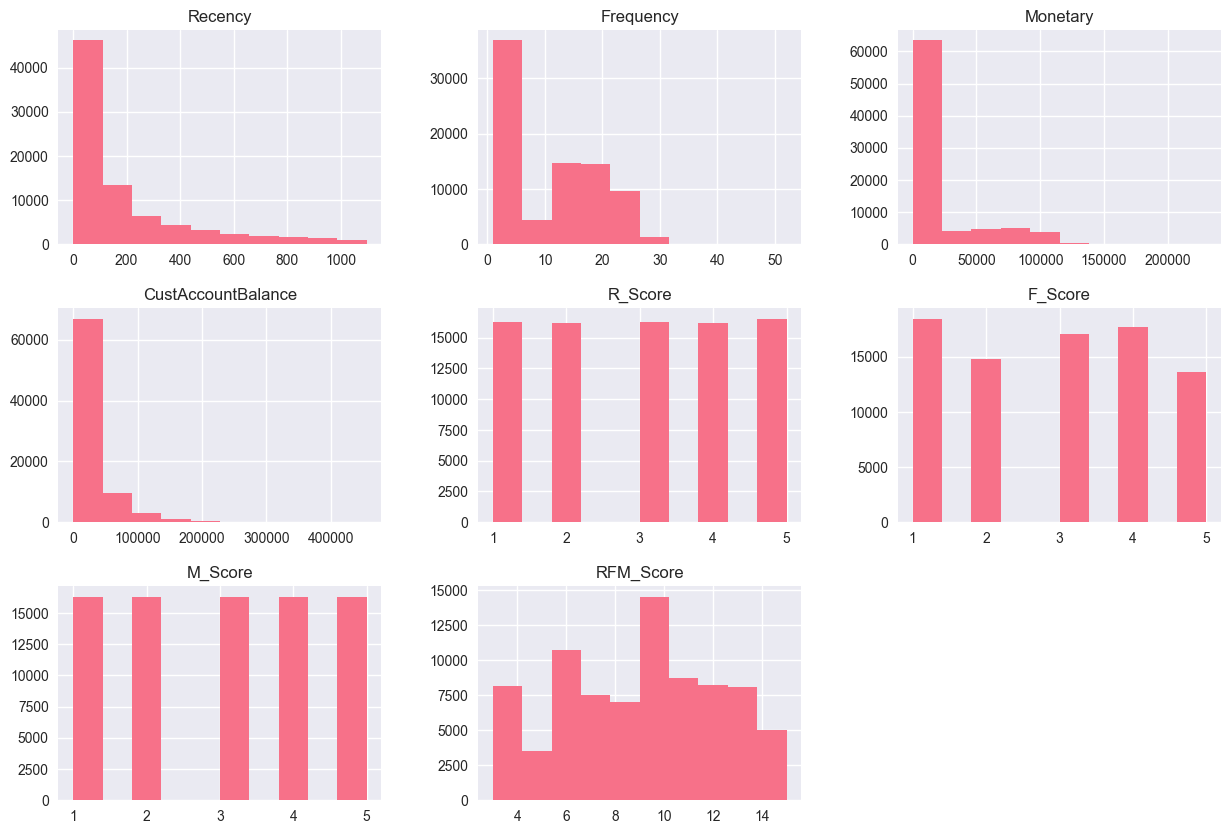

In [77]:
rfm_df.hist(figsize = (15, 10))


 === K MEANS CLUSTERING FOR RFM ===


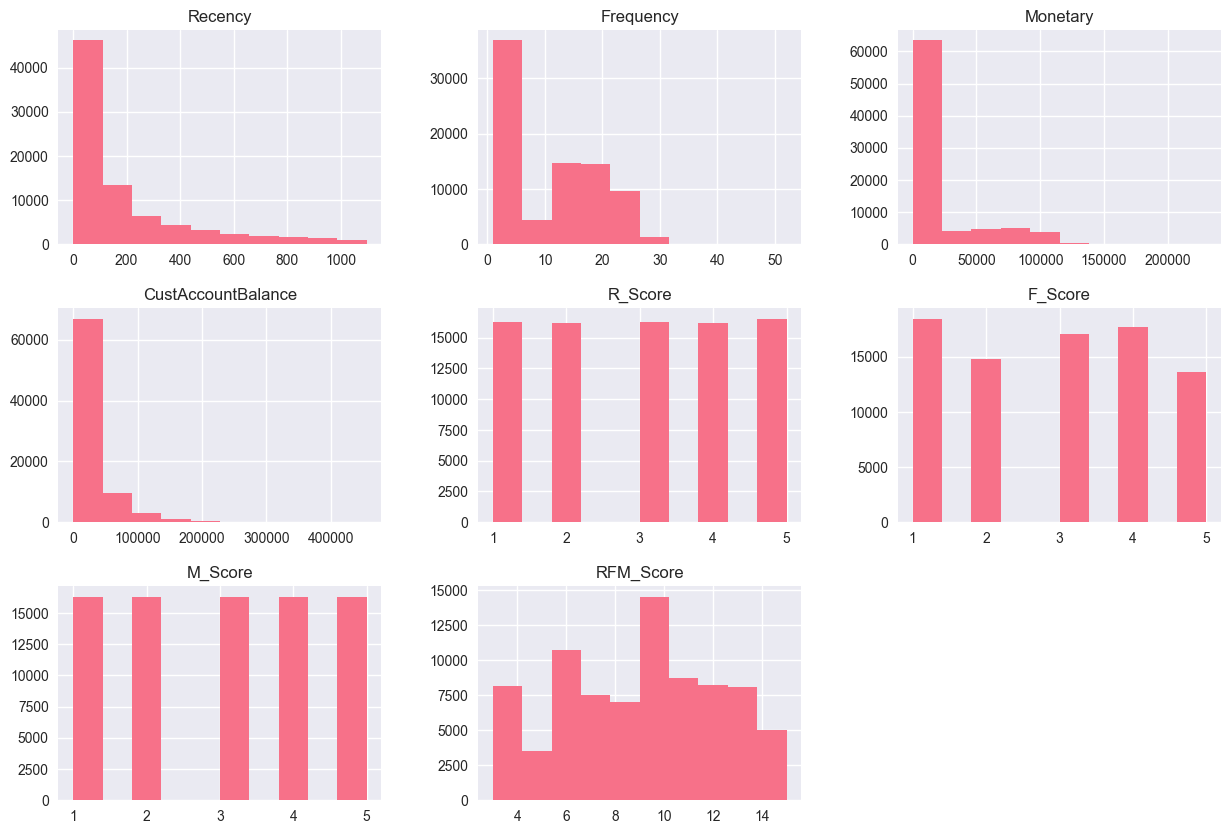

In [80]:
# Have a quick-view check of the distribution whether Left-Skewed, Right-Skewed or evenly Distributed using Histogram.
rfm_df.hist(figsize = (15, 10))

print("\n === K MEANS CLUSTERING FOR RFM ===")

# Prepare data for clustering
rfm_clustering = rfm_df[['Recency', 'Frequency', 'Monetary']].copy()

# Normalize with log transformation
rfm_clustering['Recency'] = np.log1p(rfm_clustering['Recency'])
rfm_clustering['Frequency'] = np.log1p(rfm_clustering['Frequency'])
rfm_clustering['Monetary'] = np.log1p(rfm_clustering['Monetary'])


In [82]:

# Standardize features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

print("Data prepared for clustering (scaled and transformed)", rfm_scaled_df)


Data prepared for clustering (scaled and transformed)         Recency  Frequency  Monetary
0      1.785218  -1.657004 -1.691785
1     -1.570545   0.762877 -0.608726
2      0.178149   0.694326 -0.692155
3      0.541617   1.198966 -0.353261
4     -0.266708   0.621349  1.619949
...         ...        ...       ...
81536  0.253232   0.827509  1.701379
81537  0.525653  -1.198524 -1.021046
81538  0.204074   0.888646 -0.552315
81539  1.065887  -0.873228 -0.747942
81540 -0.345274   1.366792 -0.325420

[81541 rows x 3 columns]


0        6.947937
1        2.197225
2        4.672829
3        5.187386
4        4.043051
           ...   
81536    4.779123
81537    5.164786
81538    4.709530
81539    5.929589
81540    3.931826
Name: Recency, Length: 81541, dtype: float64


<Axes: >

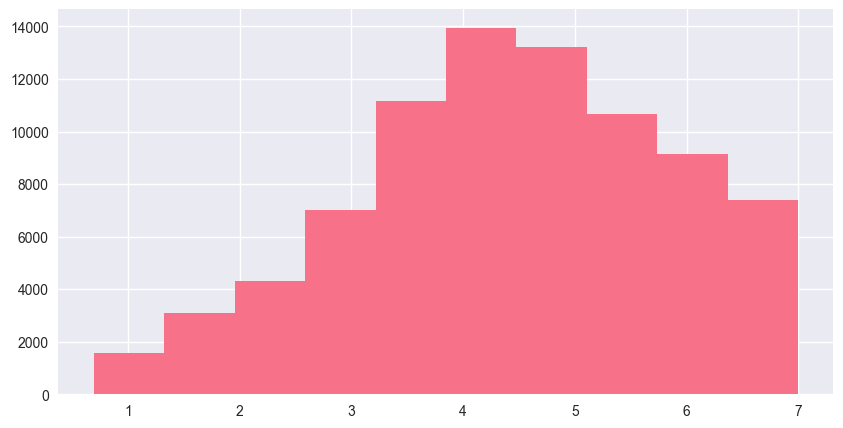

In [84]:
print(rfm_clustering['Recency'])
rfm_clustering['Recency'].hist(figsize = (10, 5))


0        0.693147
1        2.833213
2        2.772589
3        3.218876
4        2.708050
           ...   
81536    2.890372
81537    1.098612
81538    2.944439
81539    1.386294
81540    3.367296
Name: Frequency, Length: 81541, dtype: float64


<Axes: >

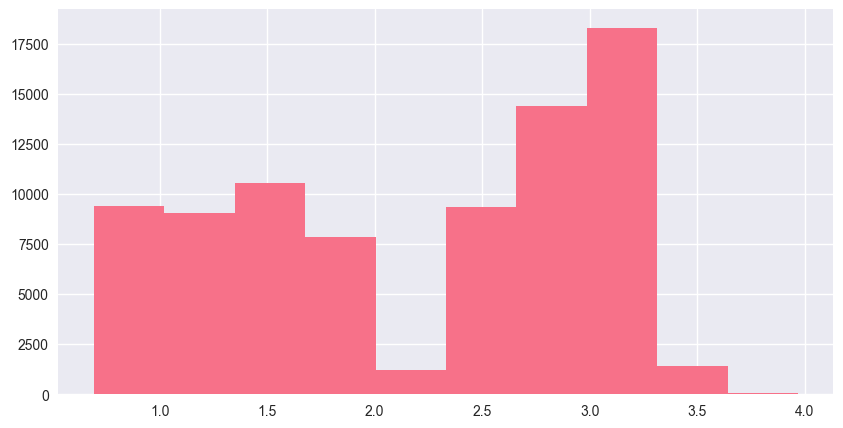

In [85]:
print(rfm_clustering['Frequency'])
rfm_clustering['Frequency'].hist(figsize = (10, 5))


0         4.578929
1         6.710292
2         6.546111
3         7.213024
4        11.096123
           ...    
81536    11.256369
81537     5.898883
81538     6.821304
81539     6.436327
81540     7.267811
Name: Monetary, Length: 81541, dtype: float64


<Axes: >

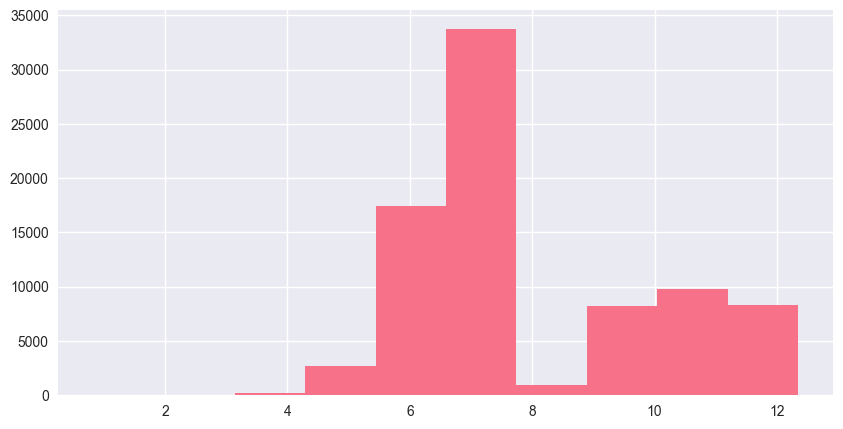

In [86]:
print(rfm_clustering['Monetary'])
rfm_clustering['Monetary'].hist(figsize = (10, 5))


## **Determining the Optimal Number of Clusters**

This section identifies the most appropriate number of clusters (k) for segmenting customers based on their RFM features. Selecting the right number of clusters is essential for producing meaningful, interpretable, and actionable customer segments.

---

### **1. Elbow Method (WCSS Analysis)**

The Elbow Method evaluates the **Within-Cluster Sum of Squares (WCSS)** for different values of k.

- As **k increases**, WCSS naturally decreases because more clusters create tighter groupings.
- The optimal k is typically found at the **“elbow point”** — the point where the rate of decrease in WCSS slows sharply.
- This point represents the best balance between **cluster compactness** (low WCSS) and **model simplicity** (fewer clusters).

---

### **2. Silhouette Score Evaluation**

The Silhouette Score measures how similar each data point is to its assigned cluster compared to other clusters.

- Scores range from **-1 to 1**, where values closer to **1** indicate well‑separated, cohesive clusters.
- By calculating silhouette scores for each k, the optimal number of clusters is the one with the **highest silhouette score**, ensuring strong separation and clear segment boundaries.

---

### **3. Visualization of Results**

Two visualizations are generated to support the selection of k:

- **Elbow Plot:** Shows WCSS values across different k values, helping identify the elbow point.
- **Silhouette Plot:** Displays silhouette scores for each k, highlighting the value that yields the strongest cluster cohesion.

These visuals work together to confirm the most appropriate number of clusters.

---

### **4. Selecting the Optimal k**

Silhouette scores across different k values are displayed to validate the final choice.  
This project automatically selects the **k with the highest silhouette score**, ensuring:

- Statistically sound clustering  
- Clear and interpretable customer segments  
- A balanced trade‑off between model complexity and segmentation accuracy  

---

This process ensures that the chosen number of clusters provides meaningful insights and supports effective customer segmentation strategies.


== DETERMINING OPTIMAL NUMBER OF CLUSTERS ===


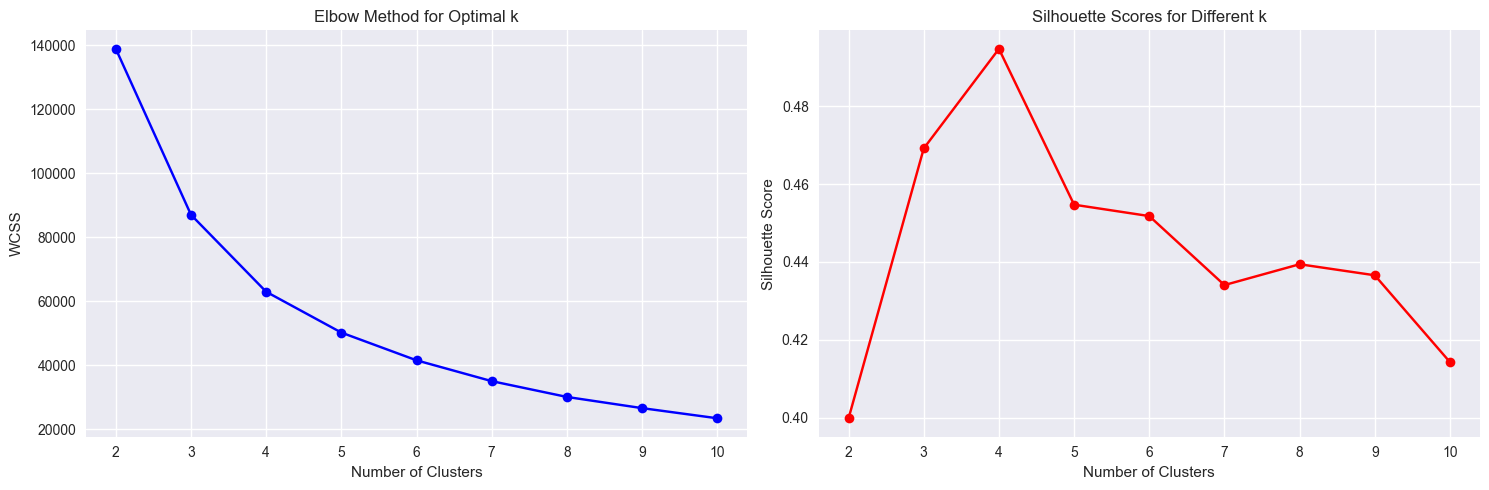

Optimal number of clusters based on silhouette score: 4
Best silhouette score: 0.4947


In [87]:
# Determine Optimal Number of Clusters
print("\n== DETERMINING OPTIMAL NUMBER OF CLUSTERS ===")

# Elbow Method and Silhouette Score
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)  # FIXED: use rfm_scaled instead of rfm_scaled_df
    wcss.append(kmeans.inertia_)

    # Silhouette score requires at least 2 clusters
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find Optimal k based on silhouette score
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")


## **Determining the Optimal Number of Clusters**

This section evaluates the most suitable number of clusters (**k**) for segmenting customers using K-Means clustering. Two complementary methods are applied to ensure statistically sound and interpretable segmentation.

---

### **1. Elbow Method (WCSS Analysis)**

- The Elbow Method analyzes the **Within-Cluster Sum of Squares (WCSS)** across different values of k.
- As k increases, WCSS decreases due to tighter clusters.
- The optimal k is identified at the **“elbow point”**, where the rate of decrease in WCSS slows significantly.
- In this analysis, the elbow occurs at **k = 4**, suggesting a good balance between model simplicity and cluster compactness.

---

### **2. Silhouette Score Evaluation**

- The Silhouette Score measures how well each data point fits within its assigned cluster compared to others.
- Scores range from **-1 to 1**, with values closer to **1** indicating well-separated, cohesive clusters.
- The highest silhouette score is observed at **k = 4**, confirming strong cluster definition and separation.

---

### **3. Visualization of Results**

Two plots are generated to support the analysis:

- **Elbow Plot:** Displays WCSS vs. number of clusters, highlighting the elbow point.
- **Silhouette Plot:** Shows silhouette scores across different k values, identifying the peak score.

---

### **4. Final Selection**

Based on both methods, **k = 4** is selected as the optimal number of clusters.  
This ensures:

- Statistically robust segmentation  
- Clear behavioral groupings  
- Balanced model complexity and interpretability

---

## **Applying K-Means Clustering and Customer Segmentation**

This section applies **K-Means clustering** to group customers based on their **Recency, Frequency, and Monetary (RFM)** metrics.  
K-Means is an unsupervised learning algorithm that enables data-driven customer segmentation and strategic business insights.

---

### **1. Applying K-Means Clustering**

Using the previously determined **optimal number of clusters (k)**, the K-Means algorithm is fitted on the RFM metrics.  
Each customer is assigned to a cluster based on their behavioral profile, capturing similarities in:

- **Purchase recency**
- **Transaction frequency**
- **Total spending**

The resulting cluster labels are stored in a new column, **`Cluster`**, within the RFM dataset.

---

### **2. Cluster Analysis and Summary Statistics**

After clustering, a detailed analysis is performed for each cluster to understand its behavioral characteristics.  
The following metrics are computed:

- **Average RFM scores** (R_Score, F_Score, M_Score)
- **Mean RFM component values**
- **Customer count per cluster**
- **Average account balance** (`Avg_Account_Balance`)
- **Gender distribution** (`Most_Common_Gender`)

This analysis provides a clear overview of how different customer segments behave and what distinguishes them.

---

### **3. Assigning Descriptive Cluster Names**

To enhance interpretability, clusters are automatically labeled based on their RFM and spending characteristics:

1. **High Spenders** – High spenders who haven't purchased in over a year  
2. **Low Spenders** – Low spenders with no recent activity  
3. **Inactive Customers** – High-value customers inactive for 6–12 months  
4. **Dormant Customers** – Low-spending customers inactive for 12+ months  
5. **Frequent Buyers** – Frequently purchasing, high-spending customers  
6. **Regular Customers** – Regularly active but low spenders  
7. **Loyal Customers** – Consistent spending and activity

These descriptive labels help translate raw cluster data into **business-friendly segments**, supporting strategic actions such as targeted marketing and personalized engagement.

---

### **4. Cluster Distribution Overview**

The final step computes and displays the **distribution of customers across cluster names**, showing:

- How customers are spread among behavioral categories  
- Which segments dominate the customer base  
- Potential business impact of each group

This overview supports prioritization of marketing efforts, loyalty programs, and service personalization based on customer value and engagement.

In [100]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# --- APPLY K-MEANS CLUSTERING ---
print("\n=== APPLYING K-MEANS WITH (optimal_k) CLUSTERS ===")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)
rfm_df.head(10)

rfm_df['cluster'].value_counts()



=== APPLYING K-MEANS WITH (optimal_k) CLUSTERS ===


cluster
2    31798
1    22478
0    15364
3    11901
Name: count, dtype: int64

In [101]:

# ANALYZE CLUSTERS
cluster_analysis = rfm_df.groupby('cluster').agg({
    'Recency': 'mean',        # not Avg_Recency
    'Frequency': 'mean',      # not Avg_Frequency
    'Monetary': 'mean',       # not Avg_Monetary
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'CustomerID': 'count',    # use an existing column to count rows
    'CustAccountBalance': 'mean',        # replace with actual column name
    'CustGender': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).round(2)

In [103]:
rfm_df["cluster"].value_counts()

cluster
2    31798
1    22478
0    15364
3    11901
Name: count, dtype: int64

In [109]:

# Rename columns after aggregation
cluster_analysis.columns = [
    'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary',
    'Avg_R_Score', 'Avg_F_Score', 'Avg_M_Score',
    'CustomerID', 'CustAccountBalance', 'Most_Common_Gender'
]

print(cluster_analysis)
display(cluster_analysis)
print("\n=== FIRST 10 ROWS OF RFM DATA WITH CLUSTERS ===")

display(rfm_df.head(10).T)

         Avg_Recency  Avg_Frequency  Avg_Monetary  Avg_R_Score  Avg_F_Score  \
cluster                                                                       
0              69.27          15.21      75828.79         3.70         3.65   
1             324.12           3.45        648.34         1.92         1.77   
2              52.52          17.84        963.53         3.95         4.03   
3             444.97           1.77      17347.04         1.64         1.17   

         Avg_M_Score  CustomerID  CustAccountBalance Most_Common_Gender  
cluster                                                                  
0               4.98       15364            16397.80                  M  
1               1.74       22478            28074.14                  M  
2               2.52       31798            27370.33                  F  
3               4.10       11901            24691.85                  M  


,Avg_Recency,Avg_Frequency,Avg_Monetary,Avg_R_Score,Avg_F_Score,Avg_M_Score,CustomerID,CustAccountBalance,Most_Common_Gender
cluster,,,,,,,,,
0,69.27,15.21,75828.79,3.70,3.65,4.98,15364,16397.80,M
1,324.12,3.45,648.34,1.92,1.77,1.74,22478,28074.14,M
2,52.52,17.84,963.53,3.95,4.03,2.52,31798,27370.33,F
3,444.97,1.77,17347.04,1.64,1.17,4.10,11901,24691.85,M



=== FIRST 10 ROWS OF RFM DATA WITH CLUSTERS ===


,0,1,2,3,4,5,6,7,8,9
CustomerID,C1000107,C1000111,C1000159,C1000852,C1000896,C1000976,C1001005,C1001021,C1001094,C1001172
Recency,1040,8,106,178,56,72,246,458,88,642
Frequency,1,16,15,24,14,19,13,1,19,1
Monetary,96.41,819.81,695.53,1355.99,65914.1,1064.7,670.3,4080.97,96064.36,7376.57
CustomerDOB,2001-06-27,1952-11-18,1988-07-23,1985-10-06,1945-04-10,2003-06-24,1960-10-12,1987-06-26,1999-12-16,2002-05-29
CustGender,F,M,M,M,M,F,F,M,F,F
CustLocation,South Josh,New Peter,Lake Duncanburgh,Thomasborough,East Kim,New Nigelville,New Frances,Roseland,West Reeceborough,Brownchester
CustAccountBalance,1150.66,52895.11,3006.98,11922.49,43815.21,1660.27,51131.84,512.7,0.0,5539.94
R_Score,1,5,3,2,4,3,2,1,3,1
F_Score,1,4,4,5,3,4,3,1,4,1


In [90]:

# REFINED CLUSTER NAMING BASED ON RECENCY FIRST
def assign_cluster_name(stats):
    recency = stats['Avg_Recency']
    frequency = stats['Avg_Frequency']
    monetary = stats['Avg_Monetary']

    # Recency thresholds
    if recency > 365:
        # Haven't purchased in a year
        if monetary > 20000:
            return "High-Value Dormant Customers"
        else:
            return "Dormant Low-Value Customers"
    elif recency > 180:
        # Haven't purchased in 6-12 months
        if monetary > 20000:
            return "High-Value Inactive Customers"
        else:
            return "Inactive Low-Value Customers"
    else:
        # Active customers (recent transactions)
        if frequency > 10 and monetary > 30000:
            return "Active VIP Customers"
        elif frequency > 8 and monetary > 10000:
            return "Active Low Value Customers"
        else:
            return "Regular Customers"

# Map names dynamically
rfm_df["Cluster Name"] = rfm_df["cluster"].map(
    lambda xx: assign_cluster_name(cluster_analysis.loc[xx])
)

# Cluster Distribution
print("\n Final Cluster Distribution")
cluster_distribution = rfm_df['Cluster Name'].value_counts()
print(cluster_distribution)



 Final Cluster Distribution
Cluster Name
Regular Customers               31798
Inactive Low-Value Customers    22478
Active VIP Customers            15364
Dormant Low-Value Customers     11901
Name: count, dtype: int64


## **Customer Segmentation Visualization and Cluster Profiling**

This section provides both visual and statistical summaries of customer segments derived from K-Means clustering on RFM metrics. These outputs help reveal segment characteristics, proportions, and behavioral differences, enabling deeper customer understanding and strategic decision-making.

---

### **1. Cluster Profile Generation**

The first step involves computing summary statistics for each customer segment (`Cluster_i`) using the RFM segmentation results.  
For every cluster, the following metrics are calculated:

- **Recency, Frequency, and Monetary:**  
  Mean and standard deviation to capture central tendencies and variability.
- **Number of Customers:**  
  Total count of customers assigned to each cluster.
- **Customer Balance:**  
  Average account balance for customers in each segment.
- **Percentage Contribution:**  
  The proportion of each cluster relative to the entire customer base.

These aggregated metrics form the foundation for quantitative comparison across clusters and help identify distinct behavioral patterns.

---

### **2. Customer Distribution Pie Chart**

A pie chart visualizes how customers are distributed across all defined segments.  
Each slice includes:

- Percentage of total customers  
- Absolute customer count  
- Color-coded labels representing behavioral groups  

This visualization highlights dominant segments as well as smaller, niche groups, making it easier to understand overall customer composition.

---

### **3. Average RFM Values by Segment (Bar Chart)**

A grouped bar chart compares the average RFM values across clusters:

- **Recency:** Indicates how recently customers made a purchase.  
- **Frequency:** Reflects how often customers transact.  
- **Monetary:** Represents total spending (scaled in thousands for readability).

This comparison helps identify high-value, high-activity, or at-risk segments and supports targeted engagement strategies.

---

### **4. Segment Size Comparison (Horizontal Bar Chart)**

A horizontal bar chart ranks customer segments by population size.  
It highlights:

- Large, general segments that make up the majority of the customer base  
- Smaller, specialized segments such as high-value or dormant customers  

Each bar includes a label showing the exact number of customers, improving clarity and quick interpretation.

---

### **5. Insights and Strategic Use**

Together, these visualizations and summaries create a comprehensive customer intelligence dashboard:

- The **pie chart** provides macro-level proportions.  
- The **bar charts** reveal micro-level behavioral and value differences.  
- The **cluster profile table** adds statistical depth and context.

This stage equips businesses to:

- Tailor marketing actions  
- Allocate resources efficiently  
- Design retention, loyalty, or reactivation campaigns  
- Build data-driven customer strategies aligned with segment behavior  

Overall, this profiling step transforms raw clustering results into actionable business insights.

In [111]:
import matplotlib.pyplot as plt
import pandas as pd

# Generate cluster profiles from rfm_df
cluster_profiles = rfm_df.groupby('Cluster Name').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std'],
    'CustomerID': 'count',               # Replace with actual ID column
    'CustAccountBalance': 'mean'         # Replace with actual balance column
}).round(2)

# Flatten multi-level column names
cluster_profiles.columns = ['_'.join(col).strip() for col in cluster_profiles.columns.values]

# Rename columns for clarity
cluster_profiles.rename(columns={
    'Recency_mean': 'Avg_Recency',
    'Recency_std': 'Recency_Stand',
    'Frequency_mean': 'Avg_Frequency',
    'Frequency_std': 'Frequency_Stand',
    'Monetary_mean': 'Avg_Monetary',
    'Monetary_std': 'Monetary_Stand',
    'CustomerID_count': 'Customer_Count',
    'CustAccountBalance_mean': 'Avg_Account_Balance'
}, inplace=True)

# Convert customer count to percentage
cluster_profiles['Percent'] = (cluster_profiles['Customer_Count'] / len(rfm_df) * 100).round(2)

print("Cluster Profiles Created Successfully!")
display(cluster_profiles)


Cluster Profiles Created Successfully!


,Avg_Recency,Recency_Stand,Avg_Frequency,Frequency_Stand,Avg_Monetary,Monetary_Stand,Customer_Count,Avg_Account_Balance,Percent
Cluster Name,,,,,,,,,
Active VIP Customers,69.27,67.66,15.21,4.65,75828.79,22739.72,15364,16397.80,18.84
Dormant Low-Value Customers,444.97,294.22,1.77,0.89,17347.04,8393.16,11901,24691.85,14.60
Inactive Low-Value Customers,324.12,249.54,3.45,2.09,648.34,356.37,22478,28074.14,27.57
Regular Customers,52.52,50.08,17.84,6.03,963.53,277.63,31798,27370.33,39.00


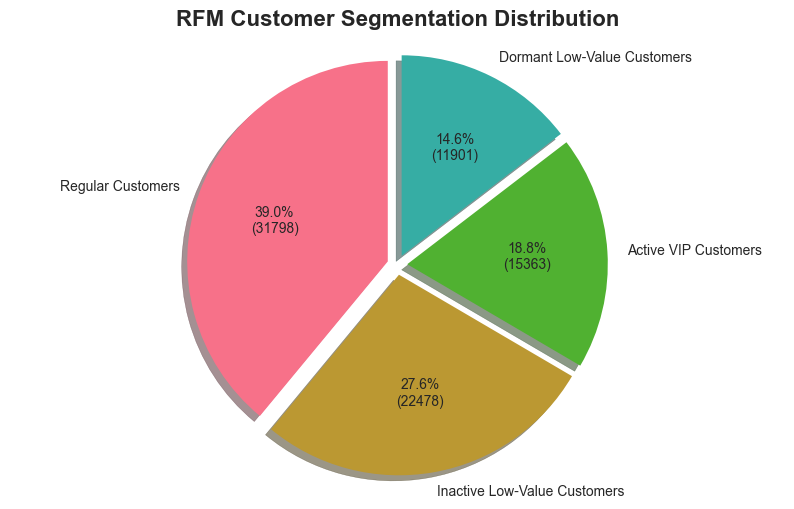

In [114]:
colors = plt.cm.tab20.colors

# Horizontal Bar Chart - Segment Sizes ...

segment_counts = rfm_df['Cluster Name'].value_counts()
plt.figure(figsize=(10, 6))
explode = [0.05] * len(segment_counts)
plt.pie(segment_counts.values,
        labels=segment_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*sum(segment_counts.values)/100)})',
        startangle=90,
        shadow=True,
        explode=explode,
        )
plt.title('RFM Customer Segmentation Distribution', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()



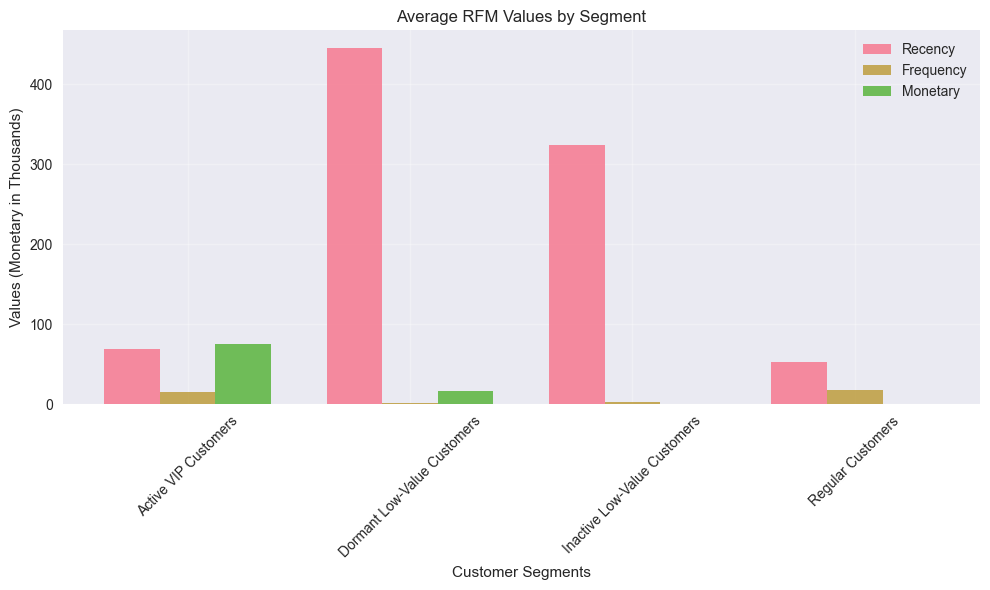

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and bar positions
rfm_metrics = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary']
x_pos = np.arange(len(cluster_profiles))  # One bar group per cluster
width = 0.25  # Width of each bar

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each RFM metric
for i, metric in enumerate(rfm_metrics):
    values = cluster_profiles[metric].values
    if metric == 'Avg_Monetary':
        values = values / 1000  # Scale monetary values to thousands
    plt.bar(x_pos + i * width, values, width,
            label=metric.replace('Avg_', ''), alpha=0.8)

# Customize axes and layout
plt.xlabel('Customer Segments')
plt.ylabel('Values (Monetary in Thousands)')
plt.title('Average RFM Values by Segment')
plt.xticks(x_pos + width, cluster_profiles.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

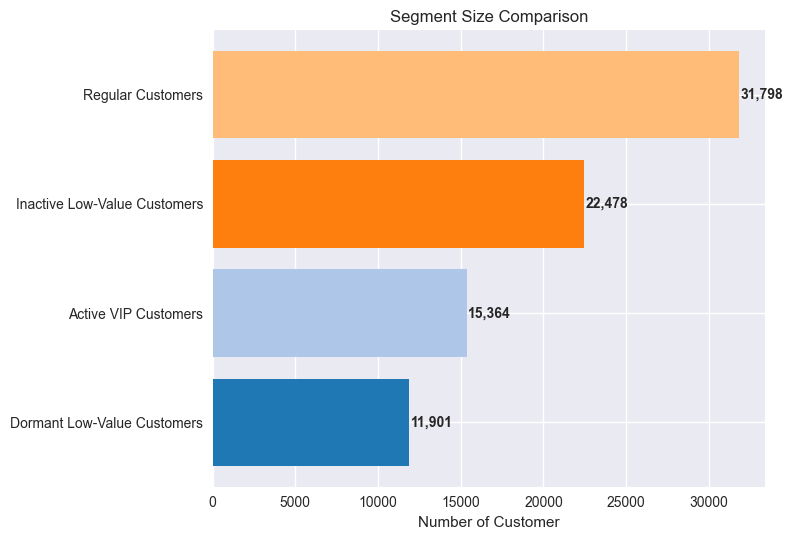

In [116]:

segment_sizes = cluster_profiles.sort_values('Customer_Count')['Customer_Count']
plt.barh(range(len(segment_sizes)), segment_sizes.values, color=colors[:len(segment_sizes)])
plt.yticks(range(len(segment_sizes)), segment_sizes.index)

# plt.xticks(range(0, max(segment_sizes['Customer Count']) + 1, 5))
plt.title('Segment Size Comparison')
plt.xlabel('Number of Customer')

'''for i, v in enumerate(segment_sizes.values):
    plt.text(v + 100, i, f'(v:,) ', va='center', fontweight='bold')'''

for i, v in enumerate(segment_sizes.values):
    plt.text(
        v + 100,          # x-position (slightly to the right of the bar)
        i,                # y-position (aligned with the bar index)
        f'{v:,}',         # formatted number with commas
        va='center',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

## **Customer Segmentation Dataset Generation**

This section defines the function `get_segmented_customers()`, which organizes, refines, and optionally exports the final segmented customer dataset produced after RFM analysis and clustering.

---

### **Purpose**

The function creates a clean and structured dataset that consolidates all relevant customer metrics, RFM scores, and their assigned clusters (both numeric and descriptive).  
It prepares results for analysis, visualization, and strategic reporting.

---

### **Core Functionalities**

1. **Input Data**  
   Accepts an RFM-enriched DataFrame (`rfm_df`) containing metrics such as:
   - Recency
   - Frequency
   - Monetary
   - RFM scores
   - Clustering results

2. **Output Customization**  
   - If `include_all_columns=False`:  
     Only key columns are retained for clarity:  
     `CustomerID`, `Recency`, `Frequency`, `Monetary`, `R_Score`, `F_Score`, `M_Score`, `Cluster`, `Cluster_Name`
   - If `include_all_columns=True`:  
     The full DataFrame is returned, preserving all original attributes for deeper analysis.

3. **Sorting Logic**  
   The dataset is sorted by:
   - `Cluster_Name` (to group customers by segment)
   - `Monetary` in descending order (to highlight high-value customers)

---

### **4. Optional Export**

If a file path is provided via `output_csv`, the dataset is automatically exported as a CSV file.  
A success message confirms the save location for traceability.

---

### **5. Output Summary**

After processing, the function prints a concise summary showing:
- Total number of customers included  
- Number of distinct customer segments (`Cluster_Name`) identified

---

### **6. Return Value**

Returns the processed and sorted DataFrame, which can be:
- Displayed directly (e.g., `display(segmented_df.head())`)  
- Used for business reporting and visualization

---

### **Outcome**

The function produces a structured, human-readable dataset that bridges analytical results with actionable insights.  
It enables quick access to customer profiles and supports segmentation-driven marketing, retention, and personalization strategies.

In [119]:
print(rfm_df.columns.tolist())

['CustomerID', 'Recency', 'Frequency', 'Monetary', 'CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Group', 'cluster', 'Cluster Name']


In [ ]:
def get_segmented_customers(rfm_df, include_all_columns=False, output_csv=None):
    """
    Returns a clean dataset of all customers with their RFM metrics,
    assigned cluster number, and human-readable segment name.
    Optionally saves the dataset to a CSV file.

    Parameters:
    -----------
    rfm_df : pd.DataFrame
        DataFrame containing RFM metrics and clustering results.
    include_all_columns : bool, default False
        If True, returns all columns in rfm_df for full context.
        If False, returns a concise view with key metrics and cluster info.
    output_csv : str or None, default None
        File path to save the dataset as CSV. If None, does not save.

    Returns:
    --------
    pd.DataFrame
        Segmented customer dataset, sorted by Cluster_Name and Monetary.
    """

    # Base columns to always include
    base_columns = [
        'CustomerID', 'Recency', 'Frequency', 'Monetary',
        'R_Score', 'F_Score', 'M_Score',
        'cluster', 'Cluster Name'
    ]

    # Select columns
    if include_all_columns:
        segmented_customers = rfm_df.copy()
    else:
        available_columns = [col for col in base_columns if col in rfm_df.columns]
        segmented_customers = rfm_df[available_columns].copy()

    # Sort by Cluster Name first, then Monetary descending
    segmented_customers.sort_values(
        by=['Cluster Name', 'Monetary'],
        ascending=[True, False],
        inplace=True
    )
    segmented_customers.reset_index(drop=True, inplace=True)

    # Save to CSV if output path provided
    if output_csv:
        segmented_customers.to_csv(output_csv, index=False)
        print(f"✅ Dataset saved to CSV: {output_csv}")

    # Summary
    print(
        f"📊 Segmented dataset created: "
        f"{len(segmented_customers)} customers across "
        f"{rfm_df['Cluster Name'].nunique()} segments."
    )

    return segmented_customers


# --- Usage example ---
segmented_df = get_segmented_customers(
    rfm_df,
    include_all_columns=False,
    output_csv="rfm_segmented_customers.csv"
)
display(segmented_df.head())

✅ Dataset saved to CSV: rfm_segmented_customers.csv
📊 Segmented dataset created: 81541 customers across 4 segments.


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,cluster,Cluster Name
0,C4616926,18,44,230287.98,5,5,5,0,Active VIP Customers
1,C4510031,68,38,202168.38,3,5,5,0,Active VIP Customers
2,C2162054,78,35,202143.59,3,5,5,0,Active VIP Customers
3,C4986191,29,42,191194.21,4,5,5,0,Active VIP Customers
4,C4626616,11,34,175436.51,5,5,5,0,Active VIP Customers


**Author:**  
Oluwaseun Opoola  
**Data Science Expert**

📧 **Email:** realsingapore@gmail.com